In [270]:
#Importing all the neccesary libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_validate


In [271]:
df= pd.read_excel("Company_Data2015-1.xlsx")

In [272]:
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.600,419.360,-7027.480,-1007.240,5936.030,474.300,-1076.340,40.500,...,0.000,0.000,0.000,0.000,0.000,0,0,45.000,0.000,0.000
1,21214,Tata Tele. Mah.,-3986.190,1954.930,-2968.080,4458.200,7410.180,9070.860,-1098.880,486.860,...,-10.300,-39.740,-57.740,-57.740,-87.180,29,101,2.000,0.310,0.240
2,14852,ABG Shipyard,-3192.580,53.840,506.860,7714.680,6944.540,1281.540,4496.250,9097.640,...,-5279.140,-5516.980,-7780.250,-7723.670,-7961.510,97,558,0.000,-0.030,-0.260
3,2439,GTL,-3054.510,157.300,-623.490,2353.880,2326.050,1033.690,-2612.420,1034.120,...,-3.330,-7.210,-48.130,-47.700,-51.580,93,63,2.000,0.240,1.900
4,23505,Bharati Defence,-2967.360,50.300,-1070.830,4675.330,5740.900,1084.200,1836.230,4685.810,...,-295.550,-400.550,-845.880,379.790,274.790,3887,346,0.000,0.010,0.050


In [273]:
df.tail()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
3581,4987,HDFC Bank,72677.770,501.300,62009.420,590576.000,496009.190,8463.300,0.000,444633.500,...,0.000,0.000,0.000,0.000,0.000,0,0,NaN,0.600,7.760
3582,502,Vedanta,79162.190,296.500,34057.870,71906.060,37643.790,29848.440,2503.860,11554.450,...,39.920,32.170,29.810,30.520,22.770,13,53,77.000,0.290,1.000
3583,12002,I O C L,88134.310,2427.950,67969.970,140686.750,55245.010,121643.450,6376.840,89609.820,...,8.090,6.690,7.310,5.690,4.290,7,30,48.000,1.420,3.240
3584,12001,NTPC,91293.700,8245.460,81657.350,173099.140,85995.340,128477.590,11449.790,42353.590,...,28.120,20.550,23.390,19.550,11.990,32,69,42.000,0.360,0.680
3585,15542,Bharti Airtel,111729.100,1998.700,78270.800,104241.000,21569.700,100084.900,-12145.300,11947.100,...,42.470,22.880,34.040,25.970,6.370,18,74,0.000,0.420,0.490


In [274]:
df.columns=df.columns.str.replace(' ', '_').str.replace('/','_by_').str.replace('&','and').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('[','_').str.replace(']','').str.replace('-','_').str.replace('.','')

In [275]:
df.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,16974,Hind.Cables,-8021.600,419.360,-7027.480,-1007.240,5936.030,474.300,-1076.340,40.500,...,0.000,0.000,0.000,0.000,0.000,0,0,45.000,0.000,0.000
1,21214,Tata Tele. Mah.,-3986.190,1954.930,-2968.080,4458.200,7410.180,9070.860,-1098.880,486.860,...,-10.300,-39.740,-57.740,-57.740,-87.180,29,101,2.000,0.310,0.240
2,14852,ABG Shipyard,-3192.580,53.840,506.860,7714.680,6944.540,1281.540,4496.250,9097.640,...,-5279.140,-5516.980,-7780.250,-7723.670,-7961.510,97,558,0.000,-0.030,-0.260
3,2439,GTL,-3054.510,157.300,-623.490,2353.880,2326.050,1033.690,-2612.420,1034.120,...,-3.330,-7.210,-48.130,-47.700,-51.580,93,63,2.000,0.240,1.900
4,23505,Bharati Defence,-2967.360,50.300,-1070.830,4675.330,5740.900,1084.200,1836.230,4685.810,...,-295.550,-400.550,-845.880,379.790,274.790,3887,346,0.000,0.010,0.050


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_by_Liabilities_  

In [277]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,3586.000,16065.389,19776.817,4.000,3029.250,6077.500,24269.500,72493.000
Networth_Next_Year,3586.000,725.045,4769.681,-8021.600,3.985,19.015,123.803,111729.100
Equity_Paid_Up,3586.000,62.967,778.762,0.000,3.750,8.290,19.517,42263.460
Networth,3586.000,649.746,4091.989,-7027.480,3.893,18.580,117.297,81657.350
Capital_Employed,3586.000,2799.611,26975.135,-1824.750,7.603,39.090,226.605,714001.250
...,...,...,...,...,...,...,...,...
Debtors_Velocity_Days,3586.000,603.894,10636.760,0.000,8.000,49.000,106.000,514721.000
Creditors_Velocity_Days,3586.000,2057.855,54169.479,0.000,8.000,39.000,89.000,2034145.000
Inventory_Velocity_Days,3483.000,79.645,137.848,-199.000,0.000,35.000,96.000,996.000
Value_of_Output_by_Total_Assets,3586.000,0.820,1.201,-0.330,0.070,0.480,1.160,17.630


In [278]:
print("There are",df.isnull().sum().sum(),"missing value in the dataset")

There are 118 missing value in the dataset


In [279]:
df.dtypes.value_counts()

float64    63
int64       3
object      1
dtype: int64

In [280]:
print("There are",df.shape,"rows and columns respectively in the dataset")

There are (3586, 67) rows and columns respectively in the dataset


In [281]:
df1= df.drop(['Co_Name','Networth','Gross_Block_','Gross_Sales','Net_Sales','Cost_of_Production','PBIDT','PBDT','PBIT','PBT','PAT','CP','Revenue_earnings_in_forex','Revenue_expenses_in_forex','Market_Capitalisation','Capital_Employed'],axis=1,inplace=False)

In [282]:
df1.head()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Total_Debt,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_by_Liabilities_,Other_Income,Value_Of_Output,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,16974,-8021.600,419.360,5936.030,-1076.340,40.500,1116.850,109.600,7.600,-0.070,...,0.000,0.000,0.000,0.000,0.000,0,0,45.000,0.000,0.000
1,21214,-3986.190,1954.930,7410.180,-1098.880,486.860,1585.740,6043.940,46.270,2900.710,...,-10.300,-39.740,-57.740,-57.740,-87.180,29,101,2.000,0.310,0.240
2,14852,-3192.580,53.840,6944.540,4496.250,9097.640,4601.390,12316.070,9.550,301.160,...,-5279.140,-5516.980,-7780.250,-7723.670,-7961.510,97,558,0.000,-0.030,-0.260
3,2439,-3054.510,157.300,2326.050,-2612.420,1034.120,3646.540,6000.420,223.850,1350.140,...,-3.330,-7.210,-48.130,-47.700,-51.580,93,63,2.000,0.240,1.900
4,23505,-2967.360,50.300,5740.900,1836.230,4685.810,2849.580,7524.910,9.820,38.720,...,-295.550,-400.550,-845.880,379.790,274.790,3887,346,0.000,0.010,0.050


In [283]:
print("There are",df1.shape,"rows and columns respectively in the dataset after dropping columns")

There are (3586, 51) rows and columns respectively in the dataset after dropping columns


In [284]:
dups =df1.duplicated()
df[dups]

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block


In [285]:
df1.isnull().sum()

Co_Code                                  0
Networth_Next_Year                       0
Equity_Paid_Up                           0
Total_Debt                               0
Net_Working_Capital_                     0
Current_Assets_                          0
Current_Liabilities_and_Provisions_      0
Total_Assets_by_Liabilities_             0
Other_Income                             0
Value_Of_Output                          0
Selling_Cost                             0
Adjusted_PAT                             0
Capital_expenses_in_forex                0
Book_Value_Unit_Curr                     0
Book_Value_Adj_Unit_Curr                 4
CEPS_annualised_Unit_Curr                0
Cash_Flow_From_Operating_Activities      0
Cash_Flow_From_Investing_Activities      0
Cash_Flow_From_Financing_Activities      0
ROG_Net_Worth_perc                       0
ROG_Capital_Employed_perc                0
ROG_Gross_Block_perc                     0
ROG_Gross_Sales_perc                     0
ROG_Net_Sal

In [286]:
df1.dtypes.value_counts()

float64    48
int64       3
dtype: int64

In [287]:
for feature in df1:
    if df1[feature].dtype=='object':
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature]=pd.Categorical(df1[feature]).codes

In [288]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 51 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Networth_Next_Year                   3586 non-null   float64
 2   Equity_Paid_Up                       3586 non-null   float64
 3   Total_Debt                           3586 non-null   float64
 4   Net_Working_Capital_                 3586 non-null   float64
 5   Current_Assets_                      3586 non-null   float64
 6   Current_Liabilities_and_Provisions_  3586 non-null   float64
 7   Total_Assets_by_Liabilities_         3586 non-null   float64
 8   Other_Income                         3586 non-null   float64
 9   Value_Of_Output                      3586 non-null   float64
 10  Selling_Cost                         3586 non-null   float64
 11  Adjusted_PAT                  

In [289]:
df1.dtypes.value_counts()

float64    48
int64       3
dtype: int64

In [290]:
cat=[]
num=[]
for i in df1.columns:
    if df1[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print("Categorical Columns:",cat)
print("/")
print("Numerical Columns:",num)

Categorical Columns: []
/
Numerical Columns: ['Co_Code', 'Networth_Next_Year', 'Equity_Paid_Up', 'Total_Debt', 'Net_Working_Capital_', 'Current_Assets_', 'Current_Liabilities_and_Provisions_', 'Total_Assets_by_Liabilities_', 'Other_Income', 'Value_Of_Output', 'Selling_Cost', 'Adjusted_PAT', 'Capital_expenses_in_forex', 'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr', 'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities', 'Cash_Flow_From_Investing_Activities', 'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc', 'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc', 'ROG_CP_perc', 'ROG_Revenue_earnings_in_forex_perc', 'ROG_Revenue_expenses_in_forex_perc', 'ROG_Market_Capitalisation_perc', 'Current_Ratio_Latest', 'Fixed_Assets_Ratio_Latest', 'Inventory_Ratio_Latest', 'Debtors_Ratio_L

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]),
 [Text(1, 0, 'Co_Code'),
  Text(2, 0, 'Networth_Next_Year'),
  Text(3, 0, 'Equity_Paid_Up'),
  Text(4, 0, 'Total_Debt'),
  Text(5, 0, 'Net_Working_Capital_'),
  Text(6, 0, 'Current_Assets_'),
  Text(7, 0, 'Current_Liabilities_and_Provisions_'),
  Text(8, 0, 'Total_Assets_by_Liabilities_'),
  Text(9, 0, 'Other_Income'),
  Text(10, 0, 'Value_Of_Output'),
  Text(11, 0, 'Selling_Cost'),
  Text(12, 0, 'Adjusted_PAT'),
  Text(13, 0, 'Capital_expenses_in_forex'),
  Text(14, 0, 'Book_Value_Unit_Curr'),
  Text(15, 0, 'Book_Value_Adj_Unit_Curr'),
  Text(16, 0, 'CEPS_annualised_Unit_Curr'),
  Text(17, 0, 'Cash_Flow_From_Operating_Activities'),
  Text(18, 0, 'Cash_Flow_From_Investing_Activities'),
  Text(19, 0, 'Cash_Flow_From_Financing_Activities'),
  Text(20, 0, 'ROG_Ne

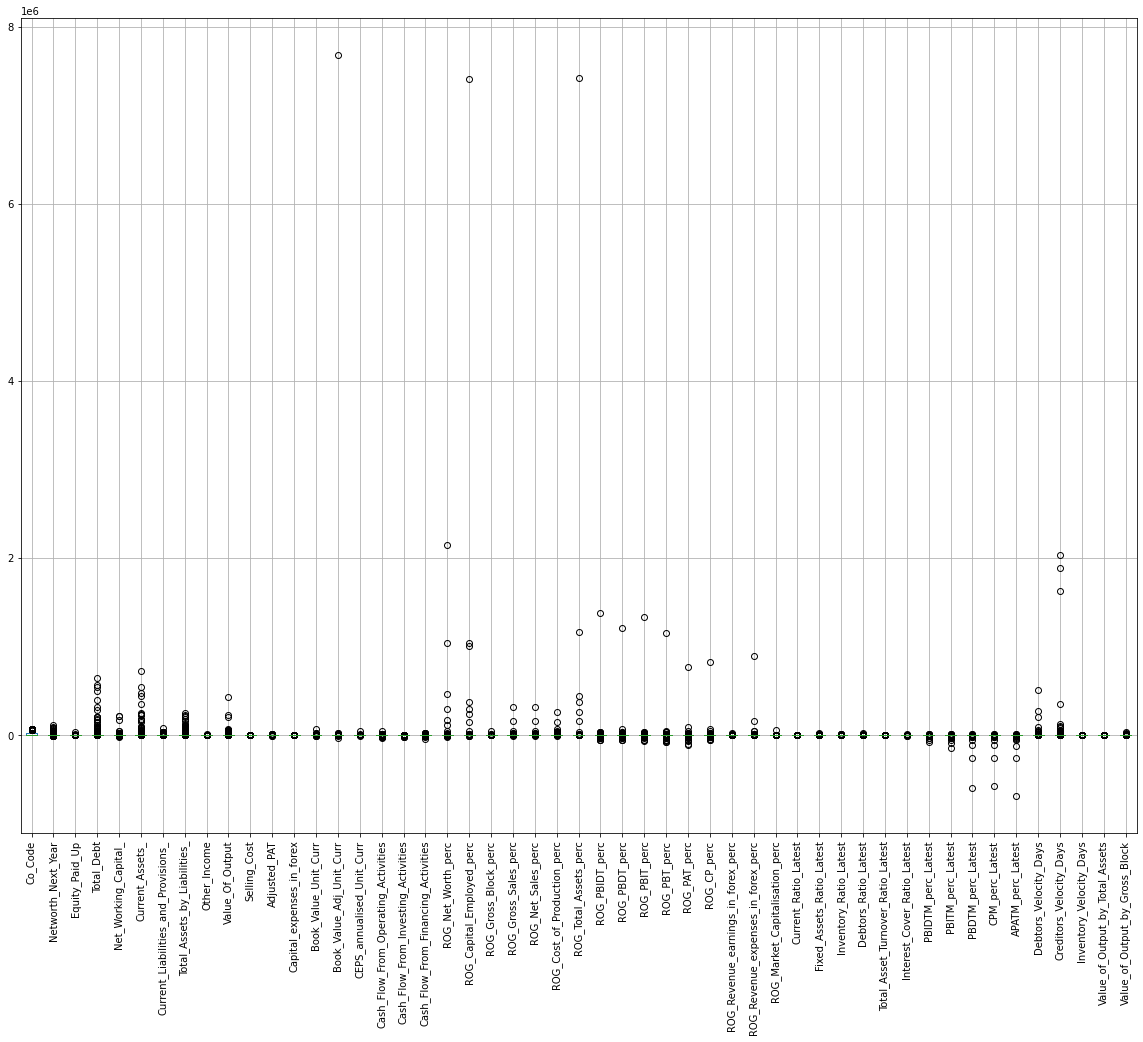

In [291]:
plt.figure(figsize=(20,15))
df1.boxplot()
plt.xticks(rotation=90)

In [292]:
Q1= df1.quantile(0.25)
Q3= df1.quantile(0.75)
IQR= Q3-Q1
UL = Q3 +(1.5*IQR)
LL = Q1 -(1.5*IQR)

In [293]:
((df1> UL)|(df1< LL)).sum()

Co_Code                                 291
Networth_Next_Year                      676
Equity_Paid_Up                          448
Total_Debt                              583
Net_Working_Capital_                    625
Current_Assets_                         577
Current_Liabilities_and_Provisions_     581
Total_Assets_by_Liabilities_            574
Other_Income                            603
Value_Of_Output                         559
Selling_Cost                            605
Adjusted_PAT                            954
Capital_expenses_in_forex               694
Book_Value_Unit_Curr                    485
Book_Value_Adj_Unit_Curr                486
CEPS_annualised_Unit_Curr               602
Cash_Flow_From_Operating_Activities     801
Cash_Flow_From_Investing_Activities     876
Cash_Flow_From_Financing_Activities    1005
ROG_Net_Worth_perc                      747
ROG_Capital_Employed_perc               572
ROG_Gross_Block_perc                    830
ROG_Gross_Sales_perc            

In [294]:
df1[((df1>UL)|(df1<LL))] = np.nan

In [295]:
df1.isnull().sum()

Co_Code                                 291
Networth_Next_Year                      676
Equity_Paid_Up                          448
Total_Debt                              583
Net_Working_Capital_                    625
Current_Assets_                         577
Current_Liabilities_and_Provisions_     581
Total_Assets_by_Liabilities_            574
Other_Income                            603
Value_Of_Output                         559
Selling_Cost                            605
Adjusted_PAT                            954
Capital_expenses_in_forex               694
Book_Value_Unit_Curr                    485
Book_Value_Adj_Unit_Curr                490
CEPS_annualised_Unit_Curr               602
Cash_Flow_From_Operating_Activities     801
Cash_Flow_From_Investing_Activities     876
Cash_Flow_From_Financing_Activities    1005
ROG_Net_Worth_perc                      747
ROG_Capital_Employed_perc               572
ROG_Gross_Block_perc                    830
ROG_Gross_Sales_perc            

In [296]:
df1.isnull().sum().sum()

31992

In [297]:
df1.shape

(3586, 51)

<AxesSubplot:>

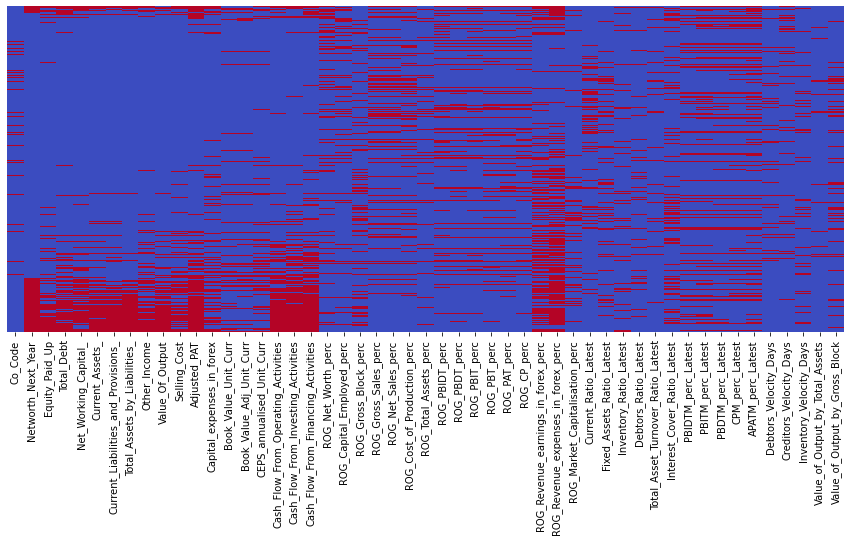

In [298]:
plt.figure(figsize=(15,6))
sns.heatmap(df1.isnull(),cbar = False,cmap="coolwarm",yticklabels=False)

In [299]:
df2= df1[df1.isnull().sum(axis=1)<=5]

In [300]:
df2.shape

(1278, 51)

In [301]:
df1.isnull().sum().sort_values(ascending=False)/df1.index.size

ROG_Revenue_expenses_in_forex_perc    0.450
ROG_Revenue_earnings_in_forex_perc    0.367
Cash_Flow_From_Financing_Activities   0.280
Adjusted_PAT                          0.266
APATM_perc_Latest                     0.260
Cash_Flow_From_Investing_Activities   0.244
ROG_Gross_Block_perc                  0.231
Cash_Flow_From_Operating_Activities   0.223
ROG_Net_Worth_perc                    0.208
Interest_Cover_Ratio_Latest           0.202
CPM_perc_Latest                       0.201
PBITM_perc_Latest                     0.200
PBDTM_perc_Latest                     0.194
Capital_expenses_in_forex             0.194
Networth_Next_Year                    0.189
ROG_Cost_of_Production_perc           0.188
ROG_Gross_Sales_perc                  0.187
ROG_Net_Sales_perc                    0.186
ROG_CP_perc                           0.178
ROG_PBDT_perc                         0.175
Net_Working_Capital_                  0.174
ROG_PBIT_perc                         0.172
ROG_PBT_perc                    

In [302]:
df1_sub= df1.drop(['ROG_Revenue_expenses_in_forex_perc','ROG_Revenue_earnings_in_forex_perc'],axis=1)

In [303]:
print("The number rows and columns in the datset are",df1_sub.shape,"respectively after dropping columns having more than 30% missing values")

The number rows and columns in the datset are (3586, 49) respectively after dropping columns having more than 30% missing values


In [304]:
#Segregating the predictors and response
predictors= df1_sub.drop("Networth_Next_Year",axis=1)
response= df1_sub['Networth_Next_Year']

In [305]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_predictors= pd.DataFrame(scaler.fit_transform(predictors),columns=predictors.columns)

In [306]:
df1_sub2= pd.concat([scaled_predictors,response],axis=1)

In [307]:
from sklearn.impute import KNNImputer

In [308]:
imputer=KNNImputer(n_neighbors=10)

In [309]:
df1_imputed=pd.DataFrame(imputer.fit_transform(df1_sub2),columns=df1_sub2.columns)

In [310]:
df1_imputed.isnull().sum()

Co_Code                                0
Equity_Paid_Up                         0
Total_Debt                             0
Net_Working_Capital_                   0
Current_Assets_                        0
Current_Liabilities_and_Provisions_    0
Total_Assets_by_Liabilities_           0
Other_Income                           0
Value_Of_Output                        0
Selling_Cost                           0
Adjusted_PAT                           0
Capital_expenses_in_forex              0
Book_Value_Unit_Curr                   0
Book_Value_Adj_Unit_Curr               0
CEPS_annualised_Unit_Curr              0
Cash_Flow_From_Operating_Activities    0
Cash_Flow_From_Investing_Activities    0
Cash_Flow_From_Financing_Activities    0
ROG_Net_Worth_perc                     0
ROG_Capital_Employed_perc              0
ROG_Gross_Block_perc                   0
ROG_Gross_Sales_perc                   0
ROG_Net_Sales_perc                     0
ROG_Cost_of_Production_perc            0
ROG_Total_Assets

In [311]:
df1_imputed.head()

,Co_Code,Equity_Paid_Up,Total_Debt,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_by_Liabilities_,Other_Income,Value_Of_Output,Selling_Cost,...,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block,Networth_Next_Year
0,0.443,0.179,0.018,-0.132,-0.070,-0.493,0.040,3.436,-0.608,-0.512,...,-0.721,-0.705,-0.719,-0.607,-0.954,-0.945,-0.047,-0.974,-0.808,18.601
1,0.781,-0.560,-0.435,-0.770,-0.574,-0.237,-0.418,-0.311,-0.432,-0.480,...,-0.867,-1.139,-1.208,-1.083,-0.433,1.209,-0.813,-0.503,-0.714,16.505
2,0.274,0.548,0.555,-0.172,1.439,1.376,1.434,0.142,1.830,0.364,...,-0.192,-0.206,-0.188,0.147,0.788,1.025,-0.848,-1.020,-0.910,104.304
3,-0.714,-0.398,-0.009,0.534,0.083,-0.310,0.299,-0.357,0.155,1.180,...,-1.491,-1.287,-1.421,-1.231,0.717,0.398,-0.813,-0.609,-0.061,26.609
4,0.964,-0.253,-0.503,-0.192,-0.405,-0.474,-0.263,-0.489,-0.294,0.486,...,-0.639,-0.479,-0.525,-0.822,0.052,0.070,-0.848,-0.959,-0.788,26.419


In [312]:
#Creating binary target using Networth_Next_Year
df1_imputed["default"]=np.where((df1_imputed["Networth_Next_Year"]>0),0,1)

In [313]:
df1_imputed[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,0,18.601
1,0,16.505
2,0,104.304
3,0,26.609
4,0,26.419
5,1,-4.055
6,0,3.349
7,1,-45.285
8,0,24.496
9,0,149.660


In [314]:
df1_imputed["default"].value_counts()

0    3246
1     340
Name: default, dtype: int64

In [315]:
df1_imputed["default"].value_counts(normalize=True)

0   0.905
1   0.095
Name: default, dtype: float64

In [316]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df1_imputed[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df1_imputed[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df1_imputed[column])
    plt.show()

In [317]:
df1_imputed_imp_features= pd.DataFrame(df1_imputed,columns=["Net_Working_Capital_","Book_Value_Unit_Curr","ROG_Net_Worth_perc","ROG_Capital_Employed_perc","ROG_Total_Assets_perc","Current_Ratio_Latest","Fixed_Assets_Ratio_Latest","Inventory_Ratio_Latest","Debtors_Ratio_Latest","Total_Asset_Turnover_Ratio_Latest","Interest_Cover_Ratio_Latest","ROG_Market_Capitalisation_perc","ROG_Cost_of_Production_perc"])

In [396]:
df1_num = df1_imputed_imp_features.select_dtypes(include = ['int64','float64','int16'])
df1_cat= df1_imputed_imp_features.select_dtypes(["object"])
Categorical_column_list=list(df1_cat.columns.values)
Numerical_column_list=list(df1_num.columns.values)
Numerical_length =len(Numerical_column_list)
Categorical_length=len(Categorical_column_list)
print("Length of numerical columns is",Numerical_length)
print("Length of categorical columns is",Categorical_length)

Length of numerical columns is 13
Length of categorical columns is 0


Description of Net_Working_Capital_
----------------------------------------------------------------------------
count   3586.000
mean       0.111
std        0.994
min       -3.266
25%       -0.559
50%       -0.283
75%        0.591
max        3.855
Name: Net_Working_Capital_, dtype: float64 Distribution of Net_Working_Capital_
----------------------------------------------------------------------------


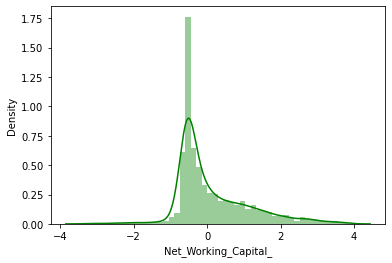

BoxPlot of Net_Working_Capital_
----------------------------------------------------------------------------


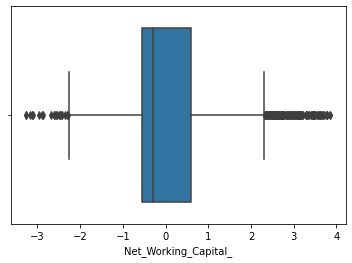

Description of Book_Value_Unit_Curr
----------------------------------------------------------------------------
count   3586.000
mean       0.088
std        0.985
min       -2.960
25%       -0.557
50%       -0.227
75%        0.620
max        3.414
Name: Book_Value_Unit_Curr, dtype: float64 Distribution of Book_Value_Unit_Curr
----------------------------------------------------------------------------


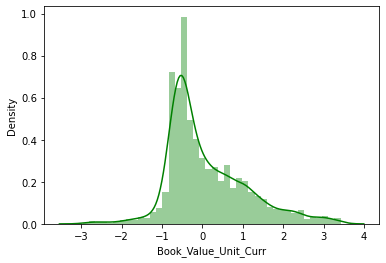

BoxPlot of Book_Value_Unit_Curr
----------------------------------------------------------------------------


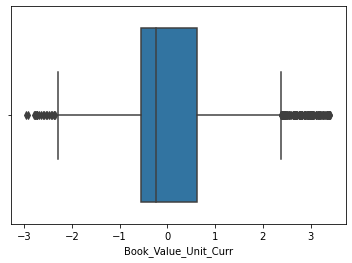

Description of ROG_Net_Worth_perc
----------------------------------------------------------------------------
count   3586.000
mean      -0.004
std        0.947
min       -2.659
25%       -0.447
50%       -0.189
75%        0.487
max        2.938
Name: ROG_Net_Worth_perc, dtype: float64 Distribution of ROG_Net_Worth_perc
----------------------------------------------------------------------------


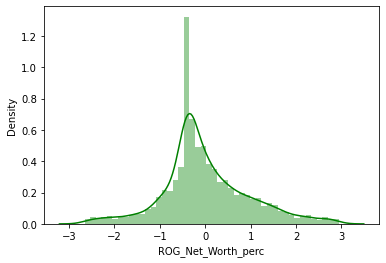

BoxPlot of ROG_Net_Worth_perc
----------------------------------------------------------------------------


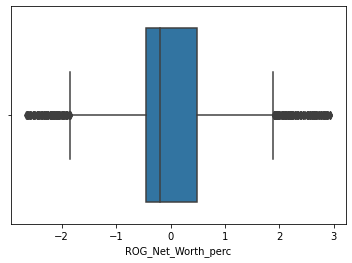

Description of ROG_Capital_Employed_perc
----------------------------------------------------------------------------
count   3586.000
mean       0.007
std        0.943
min       -2.709
25%       -0.458
50%       -0.139
75%        0.488
max        2.970
Name: ROG_Capital_Employed_perc, dtype: float64 Distribution of ROG_Capital_Employed_perc
----------------------------------------------------------------------------


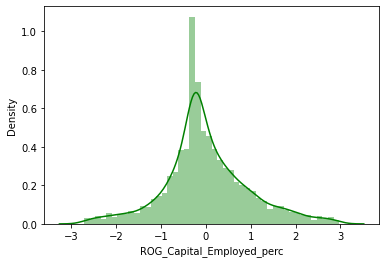

BoxPlot of ROG_Capital_Employed_perc
----------------------------------------------------------------------------


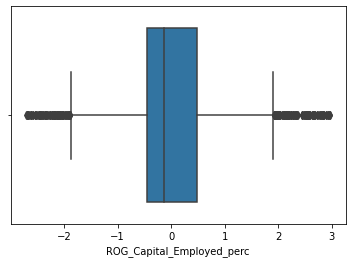

Description of ROG_Total_Assets_perc
----------------------------------------------------------------------------
count   3586.000
mean       0.010
std        0.952
min       -2.656
25%       -0.485
50%       -0.129
75%        0.490
max        2.919
Name: ROG_Total_Assets_perc, dtype: float64 Distribution of ROG_Total_Assets_perc
----------------------------------------------------------------------------


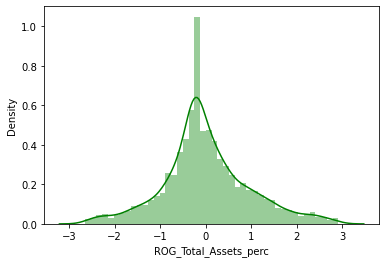

BoxPlot of ROG_Total_Assets_perc
----------------------------------------------------------------------------


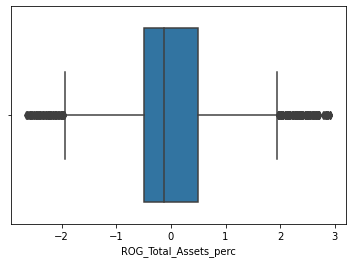

Description of Current_Ratio_Latest
----------------------------------------------------------------------------
count   3586.000
mean       0.005
std        0.938
min       -1.347
25%       -0.553
50%       -0.175
75%        0.335
max        3.916
Name: Current_Ratio_Latest, dtype: float64 Distribution of Current_Ratio_Latest
----------------------------------------------------------------------------


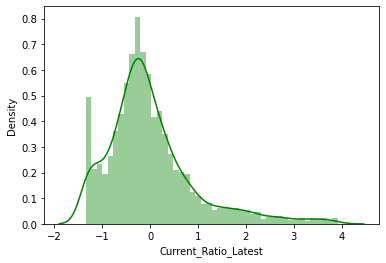

BoxPlot of Current_Ratio_Latest
----------------------------------------------------------------------------


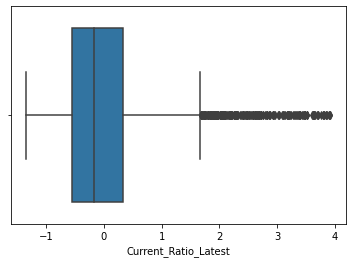

Description of Fixed_Assets_Ratio_Latest
----------------------------------------------------------------------------
count   3586.000
mean       0.022
std        0.957
min       -0.820
25%       -0.718
50%       -0.285
75%        0.385
max        3.850
Name: Fixed_Assets_Ratio_Latest, dtype: float64 Distribution of Fixed_Assets_Ratio_Latest
----------------------------------------------------------------------------


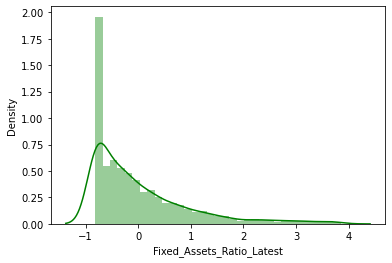

BoxPlot of Fixed_Assets_Ratio_Latest
----------------------------------------------------------------------------


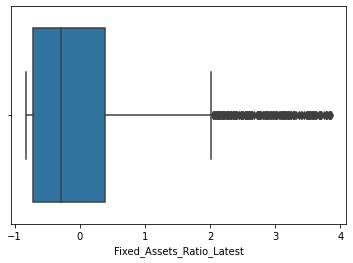

Description of Inventory_Ratio_Latest
----------------------------------------------------------------------------
count   3586.000
mean       0.026
std        0.968
min       -0.832
25%       -0.832
50%       -0.216
75%        0.525
max        3.619
Name: Inventory_Ratio_Latest, dtype: float64 Distribution of Inventory_Ratio_Latest
----------------------------------------------------------------------------


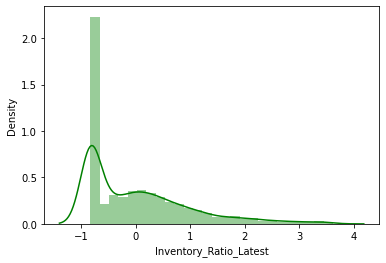

BoxPlot of Inventory_Ratio_Latest
----------------------------------------------------------------------------


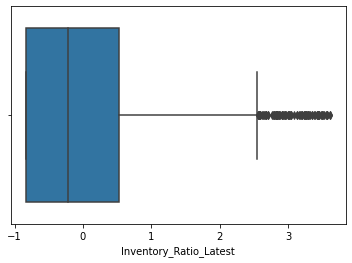

Description of Debtors_Ratio_Latest
----------------------------------------------------------------------------
count   3586.000
mean       0.025
std        0.972
min       -0.933
25%       -0.857
50%       -0.189
75%        0.504
max        3.550
Name: Debtors_Ratio_Latest, dtype: float64 Distribution of Debtors_Ratio_Latest
----------------------------------------------------------------------------


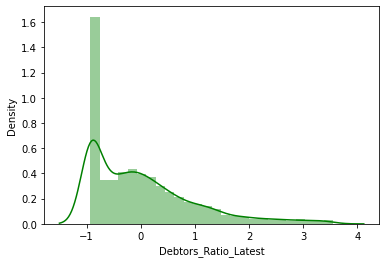

BoxPlot of Debtors_Ratio_Latest
----------------------------------------------------------------------------


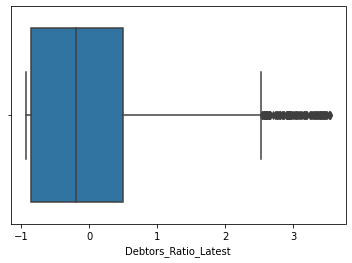

Description of Total_Asset_Turnover_Ratio_Latest
----------------------------------------------------------------------------
count   3586.000
mean       0.038
std        0.999
min       -0.911
25%       -0.834
50%       -0.291
75%        0.667
max        3.241
Name: Total_Asset_Turnover_Ratio_Latest, dtype: float64 Distribution of Total_Asset_Turnover_Ratio_Latest
----------------------------------------------------------------------------


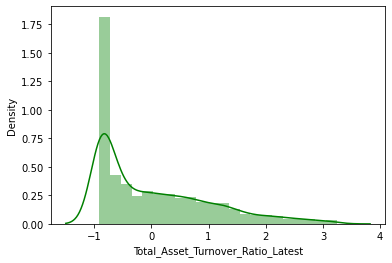

BoxPlot of Total_Asset_Turnover_Ratio_Latest
----------------------------------------------------------------------------


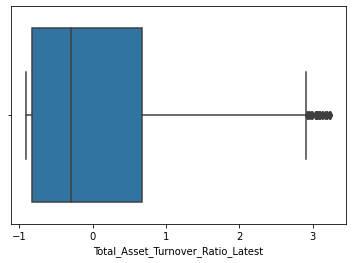

Description of Interest_Cover_Ratio_Latest
----------------------------------------------------------------------------
count   3586.000
mean       0.075
std        0.965
min       -3.041
25%       -0.562
50%       -0.097
75%        0.606
max        3.609
Name: Interest_Cover_Ratio_Latest, dtype: float64 Distribution of Interest_Cover_Ratio_Latest
----------------------------------------------------------------------------


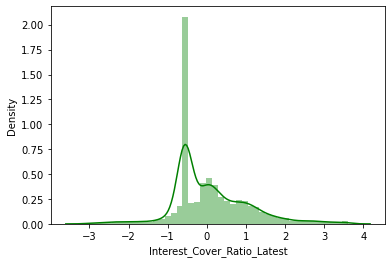

BoxPlot of Interest_Cover_Ratio_Latest
----------------------------------------------------------------------------


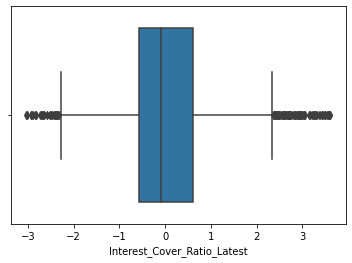

Description of ROG_Market_Capitalisation_perc
----------------------------------------------------------------------------
count   3586.000
mean       0.046
std        0.959
min       -2.396
25%       -0.319
50%       -0.319
75%        0.479
max        3.162
Name: ROG_Market_Capitalisation_perc, dtype: float64 Distribution of ROG_Market_Capitalisation_perc
----------------------------------------------------------------------------


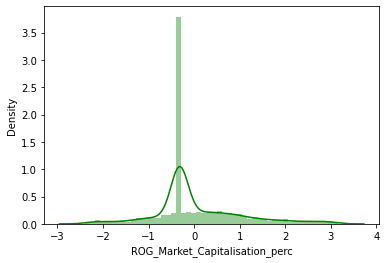

BoxPlot of ROG_Market_Capitalisation_perc
----------------------------------------------------------------------------


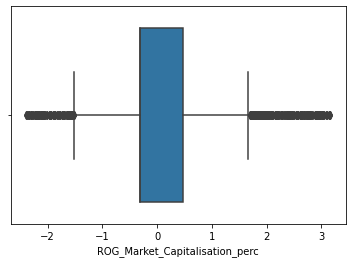

Description of ROG_Cost_of_Production_perc
----------------------------------------------------------------------------
count   3586.000
mean      -0.011
std        0.924
min       -2.597
25%       -0.407
50%       -0.067
75%        0.455
max        2.920
Name: ROG_Cost_of_Production_perc, dtype: float64 Distribution of ROG_Cost_of_Production_perc
----------------------------------------------------------------------------


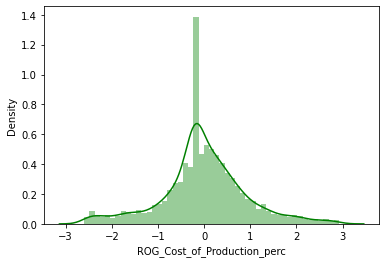

BoxPlot of ROG_Cost_of_Production_perc
----------------------------------------------------------------------------


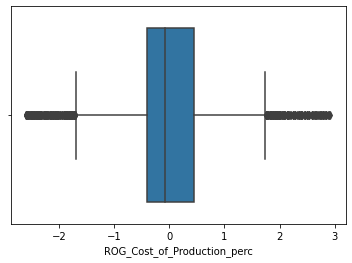

In [319]:
for x in Numerical_column_list:
    univariateAnalysis_numeric(x,20)
    pd.options.display.float_format = '{:.3f}'.format

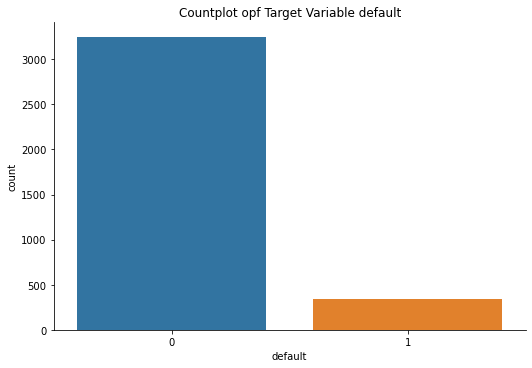

In [320]:
#Bivariate analysis
sns.catplot("default",data=df1_imputed,kind="count",aspect=1.5)
plt.title("Countplot opf Target Variable default");

Text(0.5, 1.0, 'Boxplot of important features')

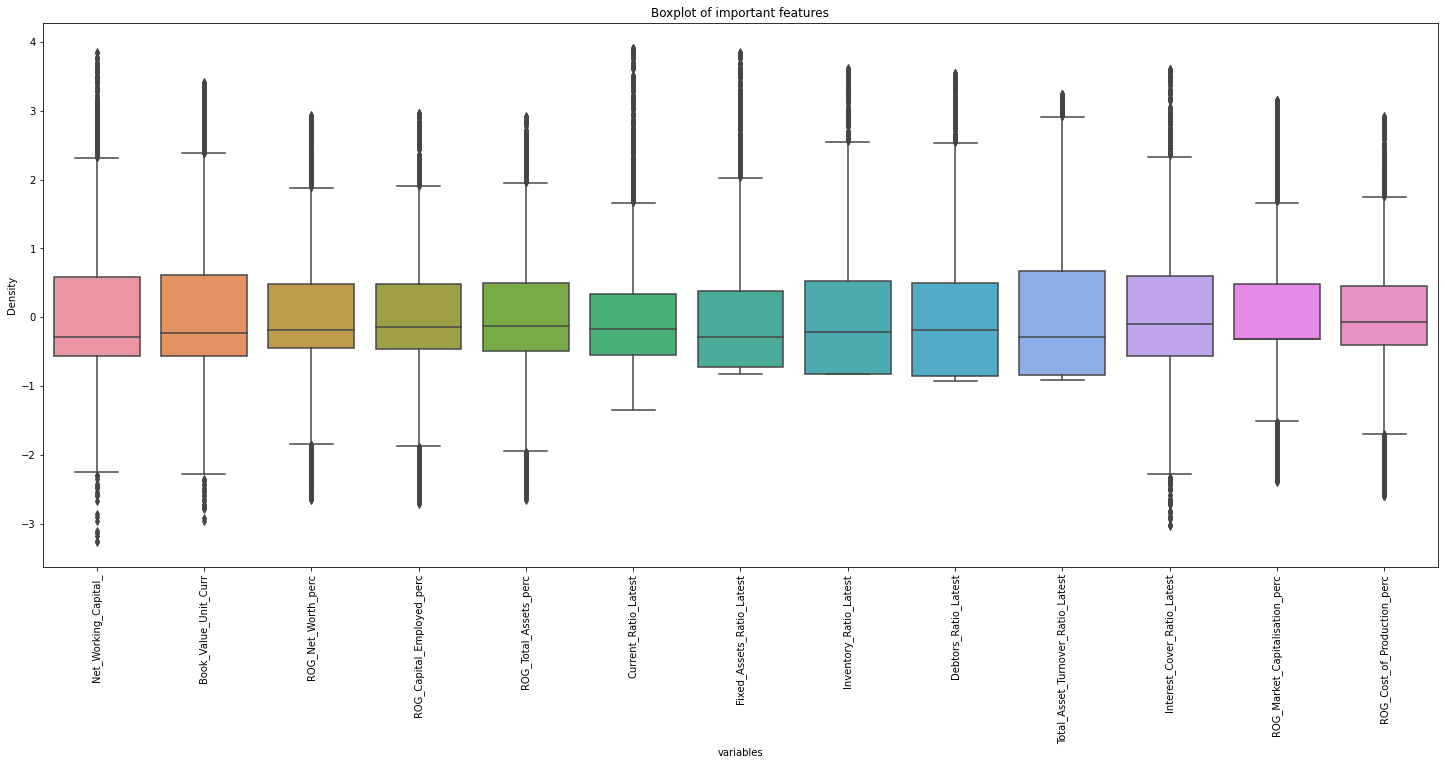

In [321]:
plt.figure(figsize=(25,10))
sns.boxplot(data=df1_imputed_imp_features)
plt.xlabel("variables")
plt.xticks(rotation=90)
plt.ylabel("Density")
plt.title("Boxplot of important features")

<AxesSubplot:ylabel='Density'>

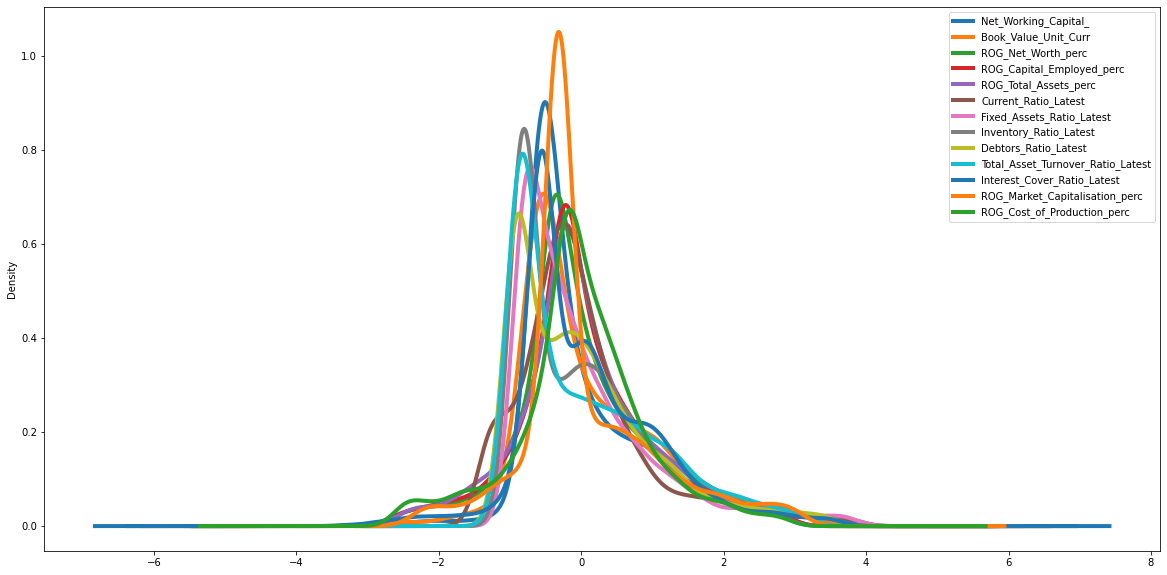

In [322]:
#Multiple density plot
df1_imputed_imp_features.plot.kde(figsize=(20,10),linewidth=4)

In [323]:
df1_imputed_imp_features.skew(axis=0,skipna =True).sort_values(ascending=True)

ROG_Cost_of_Production_perc         -0.007
ROG_Total_Assets_perc                0.280
ROG_Capital_Employed_perc            0.281
ROG_Net_Worth_perc                   0.403
Interest_Cover_Ratio_Latest          0.762
ROG_Market_Capitalisation_perc       0.863
Book_Value_Unit_Curr                 0.907
Total_Asset_Turnover_Ratio_Latest    1.031
Net_Working_Capital_                 1.152
Debtors_Ratio_Latest                 1.245
Inventory_Ratio_Latest               1.264
Current_Ratio_Latest                 1.435
Fixed_Assets_Ratio_Latest            1.658
dtype: float64

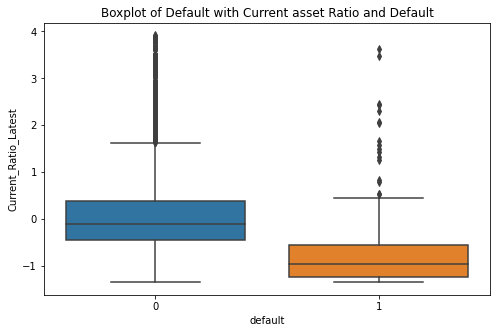

In [324]:
plt.figure(figsize=(8,5))
sns.boxplot(df1_imputed["default"],df1_imputed["Current_Ratio_Latest"],data=df1_imputed_imp_features)
plt.title("Boxplot of Default with Current asset Ratio and Default")
plt.show()

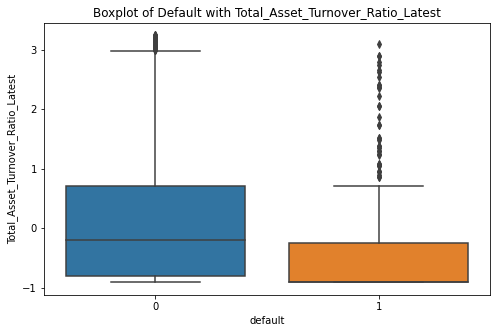

In [325]:
plt.figure(figsize=(8,5))
sns.boxplot(df1_imputed["default"],df1_imputed["Total_Asset_Turnover_Ratio_Latest"],data=df1_imputed_imp_features)
plt.title("Boxplot of Default with Total_Asset_Turnover_Ratio_Latest")
plt.show()

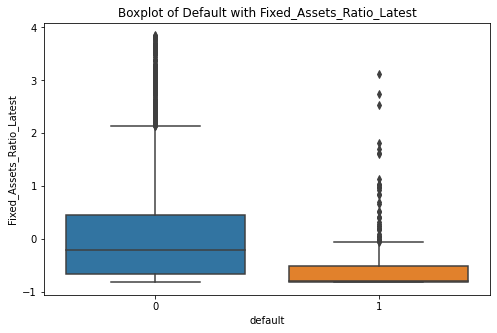

In [326]:
plt.figure(figsize=(8,5))
sns.boxplot(df1_imputed["default"],df1_imputed["Fixed_Assets_Ratio_Latest"],data=df1_imputed_imp_features)
plt.title("Boxplot of Default with Fixed_Assets_Ratio_Latest")
plt.show()

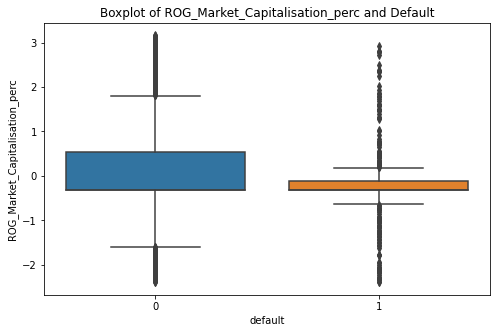

In [327]:
plt.figure(figsize=(8,5))
sns.boxplot(df1_imputed["default"],df1_imputed["ROG_Market_Capitalisation_perc"],data=df1_imputed_imp_features)
plt.title("Boxplot of ROG_Market_Capitalisation_perc and Default")
plt.show()

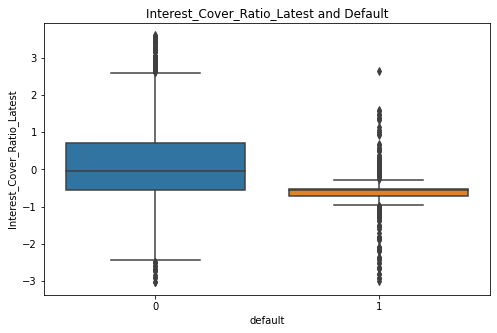

In [328]:
plt.figure(figsize=(8,5))
sns.boxplot(df1_imputed["default"],df1_imputed["Interest_Cover_Ratio_Latest"],data=df1_imputed_imp_features)
plt.title("Interest_Cover_Ratio_Latest and Default")
plt.show()

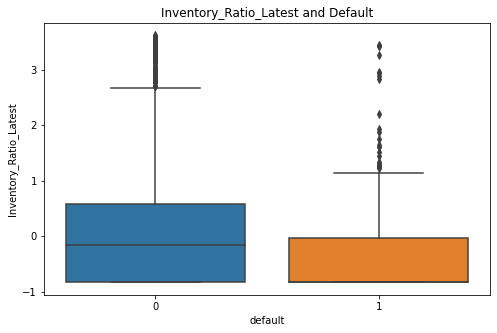

In [329]:
plt.figure(figsize=(8,5))
sns.boxplot(df1_imputed["default"],df1_imputed["Inventory_Ratio_Latest"],data=df1_imputed_imp_features)
plt.title("Inventory_Ratio_Latest and Default")
plt.show()

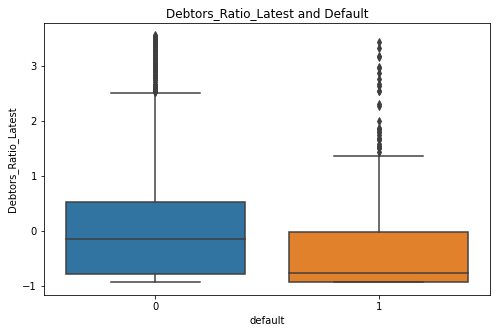

In [330]:
plt.figure(figsize=(8,5))
sns.boxplot(df1_imputed["default"],df1_imputed["Debtors_Ratio_Latest"],data=df1_imputed_imp_features)
plt.title("Debtors_Ratio_Latest and Default")
plt.show()

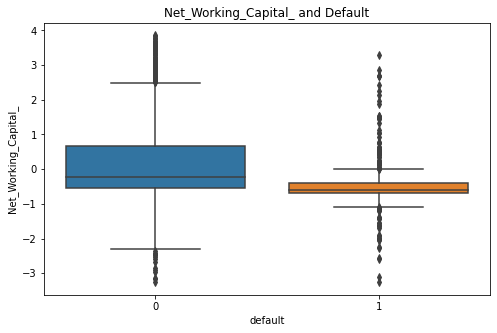

In [331]:
plt.figure(figsize=(8,5))
sns.boxplot(df1_imputed["default"],df1_imputed["Net_Working_Capital_"],data=df1_imputed_imp_features)
plt.title("Net_Working_Capital_ and Default")
plt.show()

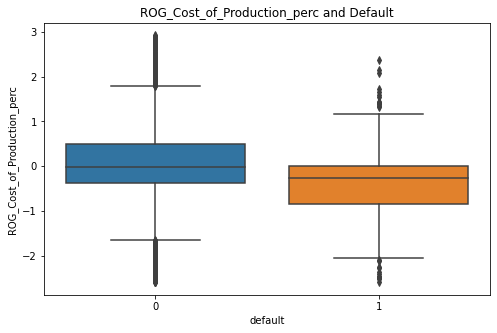

In [332]:
plt.figure(figsize=(8,5))
sns.boxplot(df1_imputed["default"],df1_imputed["ROG_Cost_of_Production_perc"],data=df1_imputed_imp_features)
plt.title("ROG_Cost_of_Production_perc and Default")
plt.show()

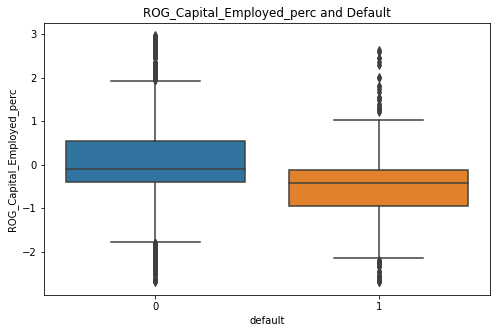

In [333]:
plt.figure(figsize=(8,5))
sns.boxplot(df1_imputed["default"],df1_imputed["ROG_Capital_Employed_perc"],data=df1_imputed_imp_features)
plt.title("ROG_Capital_Employed_perc and Default")
plt.show()

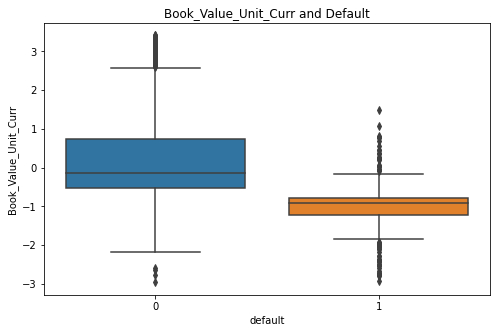

In [334]:
plt.figure(figsize=(8,5))
sns.boxplot(df1_imputed["default"],df1_imputed["Book_Value_Unit_Curr"],data=df1_imputed_imp_features)
plt.title("Book_Value_Unit_Curr and Default")
plt.show()

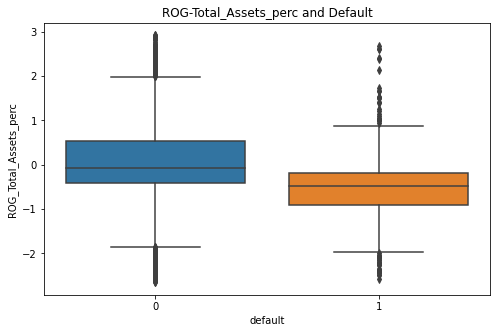

In [335]:
plt.figure(figsize=(8,5))
sns.boxplot(df1_imputed["default"],df1_imputed["ROG_Total_Assets_perc"],data=df1_imputed_imp_features)
plt.title("ROG-Total_Assets_perc and Default")
plt.show()

<AxesSubplot:>

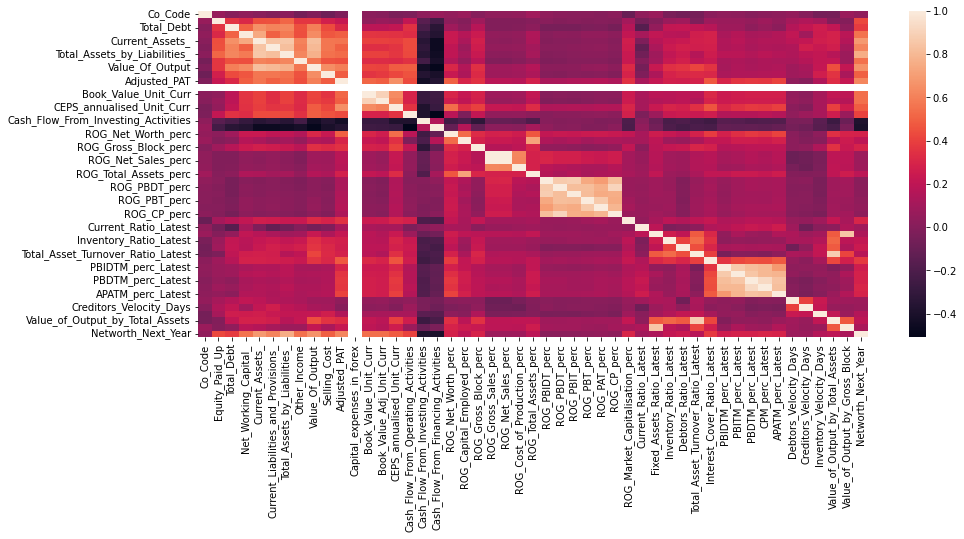

In [336]:
plt.figure(figsize=(15,6)),
corr=df1_imputed.drop("default",axis=1).corr()
sns.heatmap(corr)

In [337]:
from sklearn.feature_selection import RFE

In [338]:
predictors=df1_imputed.drop("default",axis=1)
response= df1_imputed

In [339]:
X_train,X_test,y_train,y_test = train_test_split(predictors,response,test_size=0.33, random_state=42)

In [340]:
import statsmodels.formula.api as sm

In [341]:
df1_train=pd.concat([X_train,y_train],axis=1)
df1_test = pd.concat([X_test,y_test],axis=1)

In [342]:
df1_train ["default"].value_counts()

0    2188
1     214
Name: default, dtype: int64

In [343]:
df1_train ["default"].sum()/len(df1_train ["default"])

0.0890924229808493

# Model 1

In [344]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif =pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
    return vif

In [345]:
calc_vif(X_train).sort_values(by="VIF",ascending=False)

,variables,VIF
21,ROG_Gross_Sales_perc,87.900
22,ROG_Net_Sales_perc,87.613
40,PBDTM_perc_Latest,10.026
26,ROG_PBDT_perc,9.091
4,Current_Assets_,8.777
41,CPM_perc_Latest,7.954
30,ROG_CP_perc,7.132
25,ROG_PBIDT_perc,6.716
28,ROG_PBT_perc,6.260
39,PBITM_perc_Latest,6.164


In [346]:
f1="default ~ Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Value_of_Output_by_Total_Assets + Total_Asset_Turnover_Ratio_Latest + PBDTM_perc_Latest + CPM_perc_Latest + ROG_PBIT_perc + ROG_CP_perc + Value_of_Output_by_Gross_Block + Fixed_Assets_Ratio_Latest + Adjusted_PAT + ROG_Capital_Employed_perc + ROG_Net_Worth_perc + Interest_Cover_Ratio_Latest + Selling_Cost + ROG_Total_Assets_perc + Debtors_Ratio_Latest + Inventory_Ratio_Latest + Other_Income + Cash_Flow_From_Investing_Activities + Net_Working_Capital_ + Debtors_Velocity_Days + Total_Debt + Current_Ratio_Latest + ROG_Gross_Block_perc + Cash_Flow_From_Financing_Activities + Cash_Flow_From_Investing_Activities + ROG_Market_Capitalisation_perc + Equity_Paid_Up"

In [347]:
from sklearn.linear_model import LogisticRegression

model_1=sm.logit(formula = f1,data=df1_imputed).fit()

Optimization terminated successfully.
         Current function value: 0.146548
         Iterations 10


In [348]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3557
Method:                           MLE   Df Model:                           28
Date:                Sat, 07 Jan 2023   Pseudo R-squ.:                  0.5326
Time:                        15:05:26   Log-Likelihood:                -525.52
converged:                       True   LL-Null:                       -1124.3
Covariance Type:            nonrobust   LLR p-value:                1.816e-234
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1655      0.225    -22.915      0.000      -5.607      -4.724
Book_Value_Unit_Curr                   -0.9509      0.361     -2.632      0.008      -1.659      -0.243
Book_Value_Adj_Unit_Curr               -2.5846      0.380     -6.808      0.000      -3.329      -1.840
Value_of_Output_by_Total_Assets         0.6872      0.184      3.744      0.000       0.327       1.047
Total_Asset_Turnover_Ratio_Latest      -0.2969      0.179     -1.656      0.098      -0.648       0.054
PBDTM_perc_Latest                       0.1262      0.253      0.500      0.617      -0.369       0.621
CPM_perc_Latest                        -0.3344      0.255     -1.311      0.190      -0.834       0.165
ROG_PBIT_perc                           0.0484      0.121      0.398      0.691      -0.190       0.286
ROG_CP_perc                            -0.0375      0.121     -0.311      0.756      -0.274       0.199
Value_of_Output_by_Gross_Block         -0.0353      0.209     -0.169      0.866      -0.446       0.375
Fixed_Assets_Ratio_Latest              -0.3753      0.245     -1.531      0.126      -0.856       0.105
Adjusted_PAT                           -0.2523      0.143     -1.758      0.079      -0.534       0.029
ROG_Capital_Employed_perc               0.2880      0.122      2.364      0.018       0.049       0.527
ROG_Net_Worth_perc                     -0.3206      0.120     -2.663      0.008      -0.556      -0.085
Interest_Cover_Ratio_Latest            -0.4245      0.146     -2.905      0.004      -0.711      -0.138
Selling_Cost                            0.0514      0.159      0.324      0.746      -0.259       0.362
ROG_Total_Assets_perc                  -0.1246      0.117     -1.062      0.288      -0.355       0.105
Debtors_Ratio_Latest                   -0.1705      0.113     -1.509      0.131      -0.392       0.051
Inventory_Ratio_Latest                 -0.1908      0.126     -1.515      0.130      -0.438       0.056
Other_Income                            0.0159      0.123      0.129      0.898      -0.226       0.257
Cash_Flow_From_Investing_Activities     0.2853      0.139      2.058      0.040       0.014       0.557
Net_Working_Capital_                   -0.5492      0.146     -3.770      0.000      -0.835      -0.264
Debtors_Velocity_Days                   0.1047      0.089      1.172      0.241      -0.070       0.280
Total_Debt                              0.7902      0.131      6.030      0.000       0.533       1.047
Current_Ratio_Latest                   -1.0007      0.132     -7.570      0.000      -1.260      -0.742
ROG_Gross_Block_perc                   -0.0066      0.132     -0.050      0.960      -0.266       0.252
Cash_Flow_From_Financing_Activities    -0.1389      0.122     -1.136      0.256      -0.379       0.101
ROG_Market_Capitalisation_perc         -0.0598      0.092     -0.648      0.517      -0.240       0.121
Equity_Paid_Up   

## As mostr of the p_values are having greater than 0.05, these variables are highly correlated and this can be ignored while taking only significant variables with P_values <0.05
## The elimination of these variables is done one by one, where the highest insignificant variable is removed first from logistic regression and model performance tested again to see if other variables are contributing significantly or not
## Variable 'ROG_Gross_Block_perc' has the highest p-value and is insignificant, therefore, we need to eliminate it.

# Model 2

In [349]:
f2="default ~ Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Value_of_Output_by_Total_Assets + Total_Asset_Turnover_Ratio_Latest + PBDTM_perc_Latest + CPM_perc_Latest + ROG_PBIT_perc + ROG_CP_perc + Value_of_Output_by_Gross_Block + Fixed_Assets_Ratio_Latest + Adjusted_PAT + ROG_Capital_Employed_perc + ROG_Net_Worth_perc + Interest_Cover_Ratio_Latest + Selling_Cost + ROG_Total_Assets_perc + Debtors_Ratio_Latest + Inventory_Ratio_Latest + Other_Income + Cash_Flow_From_Investing_Activities + Net_Working_Capital_ + Debtors_Velocity_Days + Total_Debt + Current_Ratio_Latest + Cash_Flow_From_Financing_Activities + Cash_Flow_From_Investing_Activities + ROG_Market_Capitalisation_perc + Equity_Paid_Up"

In [350]:
model_2=sm.logit(formula = f2,data=df1_imputed).fit()

Optimization terminated successfully.
         Current function value: 0.146549
         Iterations 10


In [351]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3558
Method:                           MLE   Df Model:                           27
Date:                Sat, 07 Jan 2023   Pseudo R-squ.:                  0.5326
Time:                        15:05:26   Log-Likelihood:                -525.52
converged:                       True   LL-Null:                       -1124.3
Covariance Type:            nonrobust   LLR p-value:                2.702e-235
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1651      0.225    -22.932      0.000      -5.607      -4.724
Book_Value_Unit_Curr                   -0.9511      0.361     -2.631      0.009      -1.659      -0.243
Book_Value_Adj_Unit_Curr               -2.5850      0.380     -6.809      0.000      -3.329      -1.841
Value_of_Output_by_Total_Assets         0.6871      0.184      3.744      0.000       0.327       1.047
Total_Asset_Turnover_Ratio_Latest      -0.2974      0.179     -1.662      0.096      -0.648       0.053
PBDTM_perc_Latest                       0.1271      0.252      0.504      0.614      -0.367       0.621
CPM_perc_Latest                        -0.3356      0.254     -1.322      0.186      -0.833       0.162
ROG_PBIT_perc                           0.0485      0.121      0.399      0.690      -0.190       0.287
ROG_CP_perc                            -0.0374      0.121     -0.310      0.757      -0.274       0.199
Value_of_Output_by_Gross_Block         -0.0357      0.209     -0.171      0.864      -0.446       0.374
Fixed_Assets_Ratio_Latest              -0.3756      0.245     -1.533      0.125      -0.856       0.105
Adjusted_PAT                           -0.2527      0.143     -1.764      0.078      -0.533       0.028
ROG_Capital_Employed_perc               0.2877      0.122      2.365      0.018       0.049       0.526
ROG_Net_Worth_perc                     -0.3205      0.120     -2.663      0.008      -0.556      -0.085
Interest_Cover_Ratio_Latest            -0.4241      0.146     -2.907      0.004      -0.710      -0.138
Selling_Cost                            0.0513      0.159      0.324      0.746      -0.259       0.362
ROG_Total_Assets_perc                  -0.1252      0.117     -1.074      0.283      -0.354       0.103
Debtors_Ratio_Latest                   -0.1707      0.113     -1.513      0.130      -0.392       0.050
Inventory_Ratio_Latest                 -0.1909      0.126     -1.516      0.130      -0.438       0.056
Other_Income                            0.0159      0.123      0.129      0.897      -0.226       0.257
Cash_Flow_From_Investing_Activities     0.2863      0.137      2.088      0.037       0.018       0.555
Net_Working_Capital_                   -0.5490      0.146     -3.771      0.000      -0.834      -0.264
Debtors_Velocity_Days                   0.1047      0.089      1.172      0.241      -0.070       0.280
Total_Debt                              0.7902      0.131      6.031      0.000       0.533       1.047
Current_Ratio_Latest                   -1.0005      0.132     -7.573      0.000      -1.260      -0.742
Cash_Flow_From_Financing_Activities    -0.1387      0.122     -1.135      0.256      -0.378       0.101
ROG_Market_Capitalisation_perc         -0.0596      0.092     -0.647      0.518      -0.240       0.121
Equity_Paid_Up                         -0.2986      0.105     -2.846      0.004      -0.504      -0.093
=================

# Variable 'Other_Income' has the highest p-value and is insignificant, therefore, we need to eliminate it.

# Model 3

In [352]:
f3="default ~ Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Value_of_Output_by_Total_Assets + Total_Asset_Turnover_Ratio_Latest + PBDTM_perc_Latest + CPM_perc_Latest + ROG_PBIT_perc + ROG_CP_perc + Value_of_Output_by_Gross_Block + Fixed_Assets_Ratio_Latest + Adjusted_PAT + ROG_Capital_Employed_perc + ROG_Net_Worth_perc + Interest_Cover_Ratio_Latest + Selling_Cost + ROG_Total_Assets_perc + Debtors_Ratio_Latest + Inventory_Ratio_Latest + Cash_Flow_From_Investing_Activities + Net_Working_Capital_ + Debtors_Velocity_Days + Total_Debt + Current_Ratio_Latest + Cash_Flow_From_Financing_Activities + Cash_Flow_From_Investing_Activities + ROG_Market_Capitalisation_perc + Equity_Paid_Up"

In [353]:
model_3=sm.logit(formula = f3,data=df1_imputed).fit()

Optimization terminated successfully.
         Current function value: 0.146551
         Iterations 10


In [354]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3559
Method:                           MLE   Df Model:                           26
Date:                Sat, 07 Jan 2023   Pseudo R-squ.:                  0.5326
Time:                        15:05:26   Log-Likelihood:                -525.53
converged:                       True   LL-Null:                       -1124.3
Covariance Type:            nonrobust   LLR p-value:                3.972e-236
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1670      0.225    -22.980      0.000      -5.608      -4.726
Book_Value_Unit_Curr                   -0.9561      0.360     -2.655      0.008      -1.662      -0.250
Book_Value_Adj_Unit_Curr               -2.5812      0.379     -6.811      0.000      -3.324      -1.838
Value_of_Output_by_Total_Assets         0.6861      0.183      3.741      0.000       0.327       1.046
Total_Asset_Turnover_Ratio_Latest      -0.2975      0.179     -1.663      0.096      -0.648       0.053
PBDTM_perc_Latest                       0.1272      0.252      0.504      0.614      -0.367       0.622
CPM_perc_Latest                        -0.3360      0.254     -1.323      0.186      -0.834       0.162
ROG_PBIT_perc                           0.0496      0.121      0.409      0.682      -0.188       0.287
ROG_CP_perc                            -0.0380      0.121     -0.315      0.753      -0.274       0.199
Value_of_Output_by_Gross_Block         -0.0353      0.209     -0.169      0.866      -0.445       0.375
Fixed_Assets_Ratio_Latest              -0.3745      0.245     -1.530      0.126      -0.854       0.105
Adjusted_PAT                           -0.2518      0.143     -1.759      0.079      -0.532       0.029
ROG_Capital_Employed_perc               0.2878      0.122      2.364      0.018       0.049       0.526
ROG_Net_Worth_perc                     -0.3205      0.120     -2.662      0.008      -0.556      -0.085
Interest_Cover_Ratio_Latest            -0.4240      0.146     -2.905      0.004      -0.710      -0.138
Selling_Cost                            0.0538      0.157      0.342      0.733      -0.255       0.362
ROG_Total_Assets_perc                  -0.1261      0.116     -1.083      0.279      -0.354       0.102
Debtors_Ratio_Latest                   -0.1690      0.112     -1.508      0.131      -0.389       0.051
Inventory_Ratio_Latest                 -0.1905      0.126     -1.513      0.130      -0.437       0.056
Cash_Flow_From_Investing_Activities     0.2869      0.137      2.093      0.036       0.018       0.556
Net_Working_Capital_                   -0.5489      0.146     -3.771      0.000      -0.834      -0.264
Debtors_Velocity_Days                   0.1049      0.089      1.175      0.240      -0.070       0.280
Total_Debt                              0.7944      0.127      6.256      0.000       0.546       1.043
Current_Ratio_Latest                   -1.0007      0.132     -7.575      0.000      -1.260      -0.742
Cash_Flow_From_Financing_Activities    -0.1411      0.121     -1.169      0.242      -0.378       0.095
ROG_Market_Capitalisation_perc         -0.0592      0.092     -0.643      0.520      -0.240       0.121
Equity_Paid_Up                         -0.2968      0.104     -2.854      0.004      -0.501      -0.093
=======================================================================================================

Possibly complet

# Variable 'Value_of_Output_by_Gross_Block' has the highest p-value and is insignificant, therefore, we need to eliminate it.

# Model 4

In [357]:
f4="default ~ Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Value_of_Output_by_Total_Assets + Total_Asset_Turnover_Ratio_Latest + PBDTM_perc_Latest + CPM_perc_Latest + ROG_PBIT_perc + ROG_CP_perc + Fixed_Assets_Ratio_Latest + Adjusted_PAT + ROG_Capital_Employed_perc + ROG_Net_Worth_perc + Interest_Cover_Ratio_Latest + Selling_Cost + ROG_Total_Assets_perc + Debtors_Ratio_Latest + Inventory_Ratio_Latest + Cash_Flow_From_Investing_Activities + Net_Working_Capital_ + Debtors_Velocity_Days + Total_Debt + Current_Ratio_Latest + Cash_Flow_From_Financing_Activities + Cash_Flow_From_Investing_Activities + ROG_Market_Capitalisation_perc + Equity_Paid_Up"

In [358]:
model_4=sm.logit(formula = f4,data=df1_imputed).fit()

Optimization terminated successfully.
         Current function value: 0.146555
         Iterations 10


In [359]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3560
Method:                           MLE   Df Model:                           25
Date:                Sat, 07 Jan 2023   Pseudo R-squ.:                  0.5326
Time:                        15:06:47   Log-Likelihood:                -525.55
converged:                       True   LL-Null:                       -1124.3
Covariance Type:            nonrobust   LLR p-value:                5.758e-237
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1691      0.225    -23.011      0.000      -5.609      -4.729
Book_Value_Unit_Curr                   -0.9583      0.360     -2.664      0.008      -1.663      -0.253
Book_Value_Adj_Unit_Curr               -2.5813      0.379     -6.811      0.000      -3.324      -1.839
Value_of_Output_by_Total_Assets         0.6813      0.181      3.763      0.000       0.326       1.036
Total_Asset_Turnover_Ratio_Latest      -0.2949      0.178     -1.656      0.098      -0.644       0.054
PBDTM_perc_Latest                       0.1283      0.252      0.508      0.611      -0.366       0.623
CPM_perc_Latest                        -0.3377      0.254     -1.329      0.184      -0.836       0.160
ROG_PBIT_perc                           0.0494      0.121      0.408      0.684      -0.188       0.287
ROG_CP_perc                            -0.0378      0.121     -0.313      0.754      -0.274       0.199
Fixed_Assets_Ratio_Latest              -0.4056      0.162     -2.506      0.012      -0.723      -0.088
Adjusted_PAT                           -0.2521      0.143     -1.761      0.078      -0.533       0.028
ROG_Capital_Employed_perc               0.2877      0.122      2.364      0.018       0.049       0.526
ROG_Net_Worth_perc                     -0.3216      0.120     -2.676      0.007      -0.557      -0.086
Interest_Cover_Ratio_Latest            -0.4236      0.146     -2.903      0.004      -0.710      -0.138
Selling_Cost                            0.0544      0.157      0.346      0.730      -0.254       0.363
ROG_Total_Assets_perc                  -0.1263      0.116     -1.085      0.278      -0.354       0.102
Debtors_Ratio_Latest                   -0.1679      0.112     -1.501      0.133      -0.387       0.051
Inventory_Ratio_Latest                 -0.1901      0.126     -1.511      0.131      -0.437       0.056
Cash_Flow_From_Investing_Activities     0.2864      0.137      2.090      0.037       0.018       0.555
Net_Working_Capital_                   -0.5495      0.146     -3.777      0.000      -0.835      -0.264
Debtors_Velocity_Days                   0.1043      0.089      1.169      0.242      -0.071       0.279
Total_Debt                              0.7948      0.127      6.260      0.000       0.546       1.044
Current_Ratio_Latest                   -1.0011      0.132     -7.580      0.000      -1.260      -0.742
Cash_Flow_From_Financing_Activities    -0.1410      0.121     -1.169      0.243      -0.377       0.095
ROG_Market_Capitalisation_perc         -0.0587      0.092     -0.638      0.524      -0.239       0.122
Equity_Paid_Up                         -0.2971      0.104     -2.858      0.004      -0.501      -0.093
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that

# Variable 'ROG_CP_perc' has the highest p-value and is insignificant, therefore, we need to eliminate it.

# Model 5

In [360]:
f5="default ~ Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Value_of_Output_by_Total_Assets + Total_Asset_Turnover_Ratio_Latest + PBDTM_perc_Latest + CPM_perc_Latest + ROG_PBIT_perc + Fixed_Assets_Ratio_Latest + Adjusted_PAT + ROG_Capital_Employed_perc + ROG_Net_Worth_perc + Interest_Cover_Ratio_Latest + Selling_Cost + ROG_Total_Assets_perc + Debtors_Ratio_Latest + Inventory_Ratio_Latest + Cash_Flow_From_Investing_Activities + Net_Working_Capital_ + Debtors_Velocity_Days + Total_Debt + Current_Ratio_Latest + Cash_Flow_From_Financing_Activities + Cash_Flow_From_Investing_Activities + ROG_Market_Capitalisation_perc + Equity_Paid_Up"

In [361]:
model_5=sm.logit(formula = f5,data=df1_imputed).fit()

Optimization terminated successfully.
         Current function value: 0.146569
         Iterations 10


In [362]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3561
Method:                           MLE   Df Model:                           24
Date:                Sat, 07 Jan 2023   Pseudo R-squ.:                  0.5325
Time:                        15:07:08   Log-Likelihood:                -525.60
converged:                       True   LL-Null:                       -1124.3
Covariance Type:            nonrobust   LLR p-value:                8.456e-238
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1692      0.225    -23.012      0.000      -5.609      -4.729
Book_Value_Unit_Curr                   -0.9636      0.359     -2.683      0.007      -1.668      -0.260
Book_Value_Adj_Unit_Curr               -2.5793      0.379     -6.814      0.000      -3.321      -1.837
Value_of_Output_by_Total_Assets         0.6851      0.180      3.796      0.000       0.331       1.039
Total_Asset_Turnover_Ratio_Latest      -0.2989      0.178     -1.684      0.092      -0.647       0.049
PBDTM_perc_Latest                       0.1283      0.253      0.508      0.612      -0.367       0.623
CPM_perc_Latest                        -0.3399      0.254     -1.337      0.181      -0.838       0.158
ROG_PBIT_perc                           0.0204      0.078      0.260      0.795      -0.133       0.174
Fixed_Assets_Ratio_Latest              -0.4073      0.162     -2.517      0.012      -0.725      -0.090
Adjusted_PAT                           -0.2536      0.143     -1.775      0.076      -0.534       0.026
ROG_Capital_Employed_perc               0.2874      0.122      2.364      0.018       0.049       0.526
ROG_Net_Worth_perc                     -0.3241      0.120     -2.704      0.007      -0.559      -0.089
Interest_Cover_Ratio_Latest            -0.4239      0.146     -2.907      0.004      -0.710      -0.138
Selling_Cost                            0.0574      0.157      0.367      0.714      -0.249       0.364
ROG_Total_Assets_perc                  -0.1254      0.116     -1.078      0.281      -0.353       0.102
Debtors_Ratio_Latest                   -0.1671      0.112     -1.496      0.135      -0.386       0.052
Inventory_Ratio_Latest                 -0.1890      0.126     -1.504      0.132      -0.435       0.057
Cash_Flow_From_Investing_Activities     0.2865      0.137      2.091      0.037       0.018       0.555
Net_Working_Capital_                   -0.5481      0.145     -3.767      0.000      -0.833      -0.263
Debtors_Velocity_Days                   0.1047      0.089      1.174      0.241      -0.070       0.280
Total_Debt                              0.7958      0.127      6.266      0.000       0.547       1.045
Current_Ratio_Latest                   -1.0003      0.132     -7.579      0.000      -1.259      -0.742
Cash_Flow_From_Financing_Activities    -0.1393      0.120     -1.156      0.248      -0.375       0.097
ROG_Market_Capitalisation_perc         -0.0584      0.092     -0.635      0.525      -0.239       0.122
Equity_Paid_Up                         -0.2979      0.104     -2.868      0.004      -0.501      -0.094
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Variable 'ROG_PBIT_perc' has the highest p-value and is insignificant, therefore, we need to eliminate it

# Model 6

In [363]:
f6="default ~ Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Value_of_Output_by_Total_Assets + Total_Asset_Turnover_Ratio_Latest + PBDTM_perc_Latest + CPM_perc_Latest + Fixed_Assets_Ratio_Latest + Adjusted_PAT + ROG_Capital_Employed_perc + ROG_Net_Worth_perc + Interest_Cover_Ratio_Latest + Selling_Cost + ROG_Total_Assets_perc + Debtors_Ratio_Latest + Inventory_Ratio_Latest + Cash_Flow_From_Investing_Activities + Net_Working_Capital_ + Debtors_Velocity_Days + Total_Debt + Current_Ratio_Latest + Cash_Flow_From_Financing_Activities + Cash_Flow_From_Investing_Activities + ROG_Market_Capitalisation_perc + Equity_Paid_Up"

In [364]:
model_6=sm.logit(formula = f6,data=df1_imputed).fit()

Optimization terminated successfully.
         Current function value: 0.146578
         Iterations 10


In [365]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3562
Method:                           MLE   Df Model:                           23
Date:                Sat, 07 Jan 2023   Pseudo R-squ.:                  0.5325
Time:                        15:07:09   Log-Likelihood:                -525.63
converged:                       True   LL-Null:                       -1124.3
Covariance Type:            nonrobust   LLR p-value:                1.198e-238
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1681      0.225    -23.019      0.000      -5.608      -4.728
Book_Value_Unit_Curr                   -0.9643      0.359     -2.683      0.007      -1.669      -0.260
Book_Value_Adj_Unit_Curr               -2.5785      0.379     -6.811      0.000      -3.321      -1.836
Value_of_Output_by_Total_Assets         0.6870      0.181      3.805      0.000       0.333       1.041
Total_Asset_Turnover_Ratio_Latest      -0.2998      0.178     -1.688      0.091      -0.648       0.048
PBDTM_perc_Latest                       0.1239      0.252      0.492      0.623      -0.370       0.617
CPM_perc_Latest                        -0.3355      0.253     -1.324      0.185      -0.832       0.161
Fixed_Assets_Ratio_Latest              -0.4055      0.162     -2.507      0.012      -0.722      -0.089
Adjusted_PAT                           -0.2479      0.141     -1.757      0.079      -0.525       0.029
ROG_Capital_Employed_perc               0.2874      0.122      2.364      0.018       0.049       0.526
ROG_Net_Worth_perc                     -0.3228      0.120     -2.696      0.007      -0.557      -0.088
Interest_Cover_Ratio_Latest            -0.4236      0.146     -2.905      0.004      -0.709      -0.138
Selling_Cost                            0.0550      0.156      0.352      0.725      -0.251       0.362
ROG_Total_Assets_perc                  -0.1236      0.116     -1.064      0.287      -0.351       0.104
Debtors_Ratio_Latest                   -0.1698      0.111     -1.525      0.127      -0.388       0.048
Inventory_Ratio_Latest                 -0.1865      0.125     -1.488      0.137      -0.432       0.059
Cash_Flow_From_Investing_Activities     0.2870      0.137      2.095      0.036       0.018       0.556
Net_Working_Capital_                   -0.5488      0.145     -3.772      0.000      -0.834      -0.264
Debtors_Velocity_Days                   0.1051      0.089      1.179      0.238      -0.070       0.280
Total_Debt                              0.7933      0.127      6.265      0.000       0.545       1.041
Current_Ratio_Latest                   -1.0011      0.132     -7.587      0.000      -1.260      -0.742
Cash_Flow_From_Financing_Activities    -0.1390      0.120     -1.154      0.249      -0.375       0.097
ROG_Market_Capitalisation_perc         -0.0595      0.092     -0.648      0.517      -0.240       0.121
Equity_Paid_Up                         -0.2960      0.104     -2.857      0.004      -0.499      -0.093
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Variable 'Selling_Cost' has the highest p-value and is insignificant, therefore, we need to eliminate it

# Model 7

In [366]:
f7="default ~ Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Value_of_Output_by_Total_Assets + Total_Asset_Turnover_Ratio_Latest + PBDTM_perc_Latest + CPM_perc_Latest + Fixed_Assets_Ratio_Latest + Adjusted_PAT + ROG_Capital_Employed_perc + ROG_Net_Worth_perc + Interest_Cover_Ratio_Latest + ROG_Total_Assets_perc + Debtors_Ratio_Latest + Inventory_Ratio_Latest + Cash_Flow_From_Investing_Activities + Net_Working_Capital_ + Debtors_Velocity_Days + Total_Debt + Current_Ratio_Latest + Cash_Flow_From_Financing_Activities + Cash_Flow_From_Investing_Activities + ROG_Market_Capitalisation_perc + Equity_Paid_Up"

In [367]:
model_7=sm.logit(formula = f7,data=df1_imputed).fit()

Optimization terminated successfully.
         Current function value: 0.146595
         Iterations 10


In [368]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3563
Method:                           MLE   Df Model:                           22
Date:                Sat, 07 Jan 2023   Pseudo R-squ.:                  0.5324
Time:                        15:07:10   Log-Likelihood:                -525.69
converged:                       True   LL-Null:                       -1124.3
Covariance Type:            nonrobust   LLR p-value:                1.703e-239
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1713      0.225    -23.030      0.000      -5.611      -4.731
Book_Value_Unit_Curr                   -0.9746      0.359     -2.716      0.007      -1.678      -0.271
Book_Value_Adj_Unit_Curr               -2.5637      0.376     -6.814      0.000      -3.301      -1.826
Value_of_Output_by_Total_Assets         0.6923      0.180      3.847      0.000       0.340       1.045
Total_Asset_Turnover_Ratio_Latest      -0.2987      0.177     -1.683      0.092      -0.647       0.049
PBDTM_perc_Latest                       0.1186      0.251      0.472      0.637      -0.374       0.611
CPM_perc_Latest                        -0.3317      0.253     -1.311      0.190      -0.828       0.164
Fixed_Assets_Ratio_Latest              -0.4024      0.161     -2.498      0.012      -0.718      -0.087
Adjusted_PAT                           -0.2434      0.141     -1.728      0.084      -0.519       0.033
ROG_Capital_Employed_perc               0.2849      0.121      2.346      0.019       0.047       0.523
ROG_Net_Worth_perc                     -0.3246      0.120     -2.711      0.007      -0.559      -0.090
Interest_Cover_Ratio_Latest            -0.4253      0.146     -2.920      0.003      -0.711      -0.140
ROG_Total_Assets_perc                  -0.1215      0.116     -1.048      0.295      -0.349       0.106
Debtors_Ratio_Latest                   -0.1678      0.111     -1.509      0.131      -0.386       0.050
Inventory_Ratio_Latest                 -0.1846      0.125     -1.477      0.140      -0.430       0.060
Cash_Flow_From_Investing_Activities     0.2804      0.136      2.065      0.039       0.014       0.547
Net_Working_Capital_                   -0.5466      0.146     -3.756      0.000      -0.832      -0.261
Debtors_Velocity_Days                   0.1063      0.089      1.194      0.232      -0.068       0.281
Total_Debt                              0.8050      0.122      6.592      0.000       0.566       1.044
Current_Ratio_Latest                   -1.0024      0.132     -7.600      0.000      -1.261      -0.744
Cash_Flow_From_Financing_Activities    -0.1435      0.120     -1.199      0.231      -0.378       0.091
ROG_Market_Capitalisation_perc         -0.0581      0.092     -0.634      0.526      -0.238       0.122
Equity_Paid_Up                         -0.2921      0.103     -2.836      0.005      -0.494      -0.090
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Variable 'PBDTM_perc_Latest' has the highest p-value and is insignificant, therefore, we need to eliminate it

## Model 8

In [369]:
f8="default ~ Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Value_of_Output_by_Total_Assets + Total_Asset_Turnover_Ratio_Latest + CPM_perc_Latest + Fixed_Assets_Ratio_Latest + Adjusted_PAT + ROG_Capital_Employed_perc + ROG_Net_Worth_perc + Interest_Cover_Ratio_Latest + ROG_Total_Assets_perc + Debtors_Ratio_Latest + Inventory_Ratio_Latest + Cash_Flow_From_Investing_Activities + Net_Working_Capital_ + Debtors_Velocity_Days + Total_Debt + Current_Ratio_Latest + Cash_Flow_From_Financing_Activities + Cash_Flow_From_Investing_Activities + ROG_Market_Capitalisation_perc + Equity_Paid_Up"

In [370]:
model_8=sm.logit(formula = f8,data=df1_imputed).fit()

Optimization terminated successfully.
         Current function value: 0.146626
         Iterations 10


In [371]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3564
Method:                           MLE   Df Model:                           21
Date:                Sat, 07 Jan 2023   Pseudo R-squ.:                  0.5323
Time:                        15:07:11   Log-Likelihood:                -525.80
converged:                       True   LL-Null:                       -1124.3
Covariance Type:            nonrobust   LLR p-value:                2.483e-240
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1701      0.224    -23.035      0.000      -5.610      -4.730
Book_Value_Unit_Curr                   -0.9677      0.358     -2.703      0.007      -1.669      -0.266
Book_Value_Adj_Unit_Curr               -2.5654      0.376     -6.825      0.000      -3.302      -1.829
Value_of_Output_by_Total_Assets         0.6894      0.179      3.844      0.000       0.338       1.041
Total_Asset_Turnover_Ratio_Latest      -0.2979      0.177     -1.680      0.093      -0.645       0.050
CPM_perc_Latest                        -0.2258      0.116     -1.943      0.052      -0.454       0.002
Fixed_Assets_Ratio_Latest              -0.4017      0.161     -2.497      0.013      -0.717      -0.086
Adjusted_PAT                           -0.2431      0.141     -1.725      0.085      -0.519       0.033
ROG_Capital_Employed_perc               0.2837      0.121      2.338      0.019       0.046       0.522
ROG_Net_Worth_perc                     -0.3209      0.119     -2.688      0.007      -0.555      -0.087
Interest_Cover_Ratio_Latest            -0.4214      0.145     -2.900      0.004      -0.706      -0.137
ROG_Total_Assets_perc                  -0.1191      0.116     -1.029      0.304      -0.346       0.108
Debtors_Ratio_Latest                   -0.1638      0.111     -1.480      0.139      -0.381       0.053
Inventory_Ratio_Latest                 -0.1891      0.125     -1.515      0.130      -0.434       0.056
Cash_Flow_From_Investing_Activities     0.2786      0.136      2.053      0.040       0.013       0.544
Net_Working_Capital_                   -0.5570      0.144     -3.861      0.000      -0.840      -0.274
Debtors_Velocity_Days                   0.1060      0.089      1.191      0.234      -0.068       0.280
Total_Debt                              0.8036      0.122      6.578      0.000       0.564       1.043
Current_Ratio_Latest                   -0.9985      0.131     -7.593      0.000      -1.256      -0.741
Cash_Flow_From_Financing_Activities    -0.1431      0.120     -1.195      0.232      -0.378       0.092
ROG_Market_Capitalisation_perc         -0.0566      0.092     -0.618      0.537      -0.236       0.123
Equity_Paid_Up                         -0.2910      0.103     -2.827      0.005      -0.493      -0.089
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Variable 'ROG_Market_Capitalisation_perc' has the highest p-value and is insignificant, therefore, we need to eliminate it

## Model 9

In [372]:
f9="default ~ Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Value_of_Output_by_Total_Assets + Total_Asset_Turnover_Ratio_Latest + CPM_perc_Latest + Fixed_Assets_Ratio_Latest + Adjusted_PAT + ROG_Capital_Employed_perc + ROG_Net_Worth_perc + Interest_Cover_Ratio_Latest + ROG_Total_Assets_perc + Debtors_Ratio_Latest + Inventory_Ratio_Latest + Cash_Flow_From_Investing_Activities + Net_Working_Capital_ + Debtors_Velocity_Days + Total_Debt + Current_Ratio_Latest + Cash_Flow_From_Financing_Activities + Cash_Flow_From_Investing_Activities + Equity_Paid_Up"

In [373]:
model_9=sm.logit(formula = f9,data=df1_imputed).fit()

Optimization terminated successfully.
         Current function value: 0.146679
         Iterations 10


In [374]:
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3565
Method:                           MLE   Df Model:                           20
Date:                Sat, 07 Jan 2023   Pseudo R-squ.:                  0.5322
Time:                        15:07:12   Log-Likelihood:                -525.99
converged:                       True   LL-Null:                       -1124.3
Covariance Type:            nonrobust   LLR p-value:                3.825e-241
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1626      0.224    -23.069      0.000      -5.601      -4.724
Book_Value_Unit_Curr                   -0.9530      0.356     -2.678      0.007      -1.650      -0.255
Book_Value_Adj_Unit_Curr               -2.5799      0.374     -6.895      0.000      -3.313      -1.847
Value_of_Output_by_Total_Assets         0.6889      0.180      3.837      0.000       0.337       1.041
Total_Asset_Turnover_Ratio_Latest      -0.3023      0.177     -1.704      0.088      -0.650       0.045
CPM_perc_Latest                        -0.2270      0.116     -1.954      0.051      -0.455       0.001
Fixed_Assets_Ratio_Latest              -0.4049      0.161     -2.509      0.012      -0.721      -0.089
Adjusted_PAT                           -0.2461      0.141     -1.749      0.080      -0.522       0.030
ROG_Capital_Employed_perc               0.2836      0.121      2.339      0.019       0.046       0.521
ROG_Net_Worth_perc                     -0.3193      0.119     -2.680      0.007      -0.553      -0.086
Interest_Cover_Ratio_Latest            -0.4213      0.145     -2.899      0.004      -0.706      -0.136
ROG_Total_Assets_perc                  -0.1212      0.116     -1.049      0.294      -0.348       0.105
Debtors_Ratio_Latest                   -0.1646      0.111     -1.488      0.137      -0.381       0.052
Inventory_Ratio_Latest                 -0.1908      0.125     -1.528      0.126      -0.435       0.054
Cash_Flow_From_Investing_Activities     0.2817      0.136      2.079      0.038       0.016       0.547
Net_Working_Capital_                   -0.5519      0.144     -3.839      0.000      -0.834      -0.270
Debtors_Velocity_Days                   0.1035      0.089      1.164      0.244      -0.071       0.278
Total_Debt                              0.7991      0.122      6.576      0.000       0.561       1.037
Current_Ratio_Latest                   -0.9986      0.131     -7.609      0.000      -1.256      -0.741
Cash_Flow_From_Financing_Activities    -0.1395      0.120     -1.165      0.244      -0.374       0.095
Equity_Paid_Up                         -0.2931      0.103     -2.851      0.004      -0.495      -0.092
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Variable 'ROG_Total_Assets_perc' has the highest p-value and is insignificant, therefore, we need to eliminate it

## Model 10

In [375]:
f10="default ~ Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Value_of_Output_by_Total_Assets + Total_Asset_Turnover_Ratio_Latest + CPM_perc_Latest + Fixed_Assets_Ratio_Latest + Adjusted_PAT + ROG_Capital_Employed_perc + ROG_Net_Worth_perc + Interest_Cover_Ratio_Latest + Debtors_Ratio_Latest + Inventory_Ratio_Latest + Cash_Flow_From_Investing_Activities + Net_Working_Capital_ + Debtors_Velocity_Days + Total_Debt + Current_Ratio_Latest + Cash_Flow_From_Financing_Activities + Cash_Flow_From_Investing_Activities + Equity_Paid_Up"

In [376]:
model_10=sm.logit(formula = f10,data=df1_imputed).fit()

Optimization terminated successfully.
         Current function value: 0.146833
         Iterations 10


In [377]:
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3566
Method:                           MLE   Df Model:                           19
Date:                Sat, 07 Jan 2023   Pseudo R-squ.:                  0.5317
Time:                        15:07:16   Log-Likelihood:                -526.54
converged:                       True   LL-Null:                       -1124.3
Covariance Type:            nonrobust   LLR p-value:                8.176e-242
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1657      0.224    -23.071      0.000      -5.605      -4.727
Book_Value_Unit_Curr                   -0.9594      0.356     -2.696      0.007      -1.657      -0.262
Book_Value_Adj_Unit_Curr               -2.5811      0.374     -6.898      0.000      -3.314      -1.848
Value_of_Output_by_Total_Assets         0.6823      0.179      3.815      0.000       0.332       1.033
Total_Asset_Turnover_Ratio_Latest      -0.2987      0.178     -1.680      0.093      -0.647       0.050
CPM_perc_Latest                        -0.2256      0.116     -1.946      0.052      -0.453       0.002
Fixed_Assets_Ratio_Latest              -0.4167      0.162     -2.576      0.010      -0.734      -0.100
Adjusted_PAT                           -0.2508      0.141     -1.784      0.074      -0.526       0.025
ROG_Capital_Employed_perc               0.2154      0.103      2.088      0.037       0.013       0.418
ROG_Net_Worth_perc                     -0.3290      0.118     -2.777      0.005      -0.561      -0.097
Interest_Cover_Ratio_Latest            -0.4288      0.145     -2.949      0.003      -0.714      -0.144
Debtors_Ratio_Latest                   -0.1612      0.111     -1.458      0.145      -0.378       0.055
Inventory_Ratio_Latest                 -0.1886      0.125     -1.510      0.131      -0.433       0.056
Cash_Flow_From_Investing_Activities     0.2908      0.135      2.152      0.031       0.026       0.556
Net_Working_Capital_                   -0.5524      0.143     -3.851      0.000      -0.834      -0.271
Debtors_Velocity_Days                   0.1091      0.089      1.232      0.218      -0.064       0.283
Total_Debt                              0.8002      0.121      6.605      0.000       0.563       1.038
Current_Ratio_Latest                   -0.9992      0.132     -7.597      0.000      -1.257      -0.741
Cash_Flow_From_Financing_Activities    -0.1402      0.120     -1.172      0.241      -0.375       0.094
Equity_Paid_Up                         -0.2912      0.102     -2.843      0.004      -0.492      -0.090
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Variable 'Cash_Flow_From_Financing_Activities' has the highest p-value and is insignificant, therefore, we need to eliminate it

## Model 11

In [378]:
f11="default ~ Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Value_of_Output_by_Total_Assets + Total_Asset_Turnover_Ratio_Latest + CPM_perc_Latest + Fixed_Assets_Ratio_Latest + Adjusted_PAT + ROG_Capital_Employed_perc + ROG_Net_Worth_perc + Interest_Cover_Ratio_Latest + Debtors_Ratio_Latest + Inventory_Ratio_Latest + Cash_Flow_From_Investing_Activities + Net_Working_Capital_ + Debtors_Velocity_Days + Total_Debt + Current_Ratio_Latest + Cash_Flow_From_Investing_Activities + Equity_Paid_Up"

In [379]:
model_11=sm.logit(formula = f11,data=df1_imputed).fit()

Optimization terminated successfully.
         Current function value: 0.147023
         Iterations 10


In [380]:
model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3567
Method:                           MLE   Df Model:                           18
Date:                Sat, 07 Jan 2023   Pseudo R-squ.:                  0.5311
Time:                        15:07:17   Log-Likelihood:                -527.22
converged:                       True   LL-Null:                       -1124.3
Covariance Type:            nonrobust   LLR p-value:                1.934e-242
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1503      0.223    -23.079      0.000      -5.588      -4.713
Book_Value_Unit_Curr                   -0.9909      0.360     -2.754      0.006      -1.696      -0.286
Book_Value_Adj_Unit_Curr               -2.5351      0.375     -6.765      0.000      -3.270      -1.801
Value_of_Output_by_Total_Assets         0.6867      0.178      3.864      0.000       0.338       1.035
Total_Asset_Turnover_Ratio_Latest      -0.2962      0.177     -1.676      0.094      -0.643       0.050
CPM_perc_Latest                        -0.2157      0.115     -1.868      0.062      -0.442       0.011
Fixed_Assets_Ratio_Latest              -0.4202      0.161     -2.603      0.009      -0.737      -0.104
Adjusted_PAT                           -0.2344      0.141     -1.663      0.096      -0.511       0.042
ROG_Capital_Employed_perc               0.1849      0.100      1.854      0.064      -0.011       0.380
ROG_Net_Worth_perc                     -0.3239      0.119     -2.731      0.006      -0.556      -0.091
Interest_Cover_Ratio_Latest            -0.4137      0.145     -2.861      0.004      -0.697      -0.130
Debtors_Ratio_Latest                   -0.1556      0.110     -1.413      0.158      -0.372       0.060
Inventory_Ratio_Latest                 -0.1845      0.124     -1.484      0.138      -0.428       0.059
Cash_Flow_From_Investing_Activities     0.3103      0.135      2.301      0.021       0.046       0.575
Net_Working_Capital_                   -0.5411      0.142     -3.801      0.000      -0.820      -0.262
Debtors_Velocity_Days                   0.1054      0.088      1.193      0.233      -0.068       0.279
Total_Debt                              0.8295      0.119      6.967      0.000       0.596       1.063
Current_Ratio_Latest                   -1.0048      0.131     -7.644      0.000      -1.262      -0.747
Equity_Paid_Up                         -0.2895      0.102     -2.826      0.005      -0.490      -0.089
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Variable 'Debtors_Velocity_Days' has the highest p-value and is insignificant, therefore, we need to eliminate it

## Model 12

In [381]:
f12="default ~ Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Value_of_Output_by_Total_Assets + Total_Asset_Turnover_Ratio_Latest + CPM_perc_Latest + Fixed_Assets_Ratio_Latest + Adjusted_PAT + ROG_Capital_Employed_perc + ROG_Net_Worth_perc + Interest_Cover_Ratio_Latest + Debtors_Ratio_Latest + Inventory_Ratio_Latest + Cash_Flow_From_Investing_Activities + Net_Working_Capital_ + Total_Debt + Current_Ratio_Latest + Cash_Flow_From_Investing_Activities + Equity_Paid_Up"

In [382]:
model_12=sm.logit(formula = f12,data=df1_imputed).fit()

Optimization terminated successfully.
         Current function value: 0.147217
         Iterations 10


In [383]:
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3568
Method:                           MLE   Df Model:                           17
Date:                Sat, 07 Jan 2023   Pseudo R-squ.:                  0.5305
Time:                        15:07:18   Log-Likelihood:                -527.92
converged:                       True   LL-Null:                       -1124.3
Covariance Type:            nonrobust   LLR p-value:                4.523e-243
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1452      0.223    -23.058      0.000      -5.583      -4.708
Book_Value_Unit_Curr                   -1.0241      0.358     -2.861      0.004      -1.726      -0.323
Book_Value_Adj_Unit_Curr               -2.5007      0.372     -6.720      0.000      -3.230      -1.771
Value_of_Output_by_Total_Assets         0.6753      0.177      3.812      0.000       0.328       1.023
Total_Asset_Turnover_Ratio_Latest      -0.2776      0.176     -1.579      0.114      -0.622       0.067
CPM_perc_Latest                        -0.2114      0.115     -1.835      0.067      -0.437       0.014
Fixed_Assets_Ratio_Latest              -0.4014      0.160     -2.507      0.012      -0.715      -0.088
Adjusted_PAT                           -0.2439      0.140     -1.738      0.082      -0.519       0.031
ROG_Capital_Employed_perc               0.1856      0.100      1.860      0.063      -0.010       0.381
ROG_Net_Worth_perc                     -0.3228      0.118     -2.725      0.006      -0.555      -0.091
Interest_Cover_Ratio_Latest            -0.4310      0.144     -2.995      0.003      -0.713      -0.149
Debtors_Ratio_Latest                   -0.1599      0.110     -1.454      0.146      -0.375       0.056
Inventory_Ratio_Latest                 -0.1629      0.122     -1.330      0.184      -0.403       0.077
Cash_Flow_From_Investing_Activities     0.3138      0.135      2.326      0.020       0.049       0.578
Net_Working_Capital_                   -0.5201      0.140     -3.703      0.000      -0.795      -0.245
Total_Debt                              0.8317      0.119      7.004      0.000       0.599       1.064
Current_Ratio_Latest                   -0.9868      0.130     -7.603      0.000      -1.241      -0.732
Equity_Paid_Up                         -0.2815      0.102     -2.762      0.006      -0.481      -0.082
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Variable 'Inventory_Ratio_Latest' has the highest p-value and is insignificant, therefore, we need to eliminate it

## Model 13

In [384]:
f13="default ~ Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Value_of_Output_by_Total_Assets + Total_Asset_Turnover_Ratio_Latest + CPM_perc_Latest + Fixed_Assets_Ratio_Latest + Adjusted_PAT + ROG_Capital_Employed_perc + ROG_Net_Worth_perc + Interest_Cover_Ratio_Latest + Debtors_Ratio_Latest + Cash_Flow_From_Investing_Activities + Net_Working_Capital_ + Total_Debt + Current_Ratio_Latest + Cash_Flow_From_Investing_Activities + Equity_Paid_Up"

In [385]:
model_13=sm.logit(formula = f13,data=df1_imputed).fit()

Optimization terminated successfully.
         Current function value: 0.147472
         Iterations 10


In [386]:
model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3569
Method:                           MLE   Df Model:                           16
Date:                Sat, 07 Jan 2023   Pseudo R-squ.:                  0.5296
Time:                        15:07:19   Log-Likelihood:                -528.83
converged:                       True   LL-Null:                       -1124.3
Covariance Type:            nonrobust   LLR p-value:                1.272e-243
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.1229      0.221    -23.165      0.000      -5.556      -4.689
Book_Value_Unit_Curr                   -1.0029      0.355     -2.822      0.005      -1.700      -0.306
Book_Value_Adj_Unit_Curr               -2.5097      0.370     -6.780      0.000      -3.235      -1.784
Value_of_Output_by_Total_Assets         0.6619      0.177      3.733      0.000       0.314       1.009
Total_Asset_Turnover_Ratio_Latest      -0.3229      0.173     -1.862      0.063      -0.663       0.017
CPM_perc_Latest                        -0.2082      0.115     -1.804      0.071      -0.434       0.018
Fixed_Assets_Ratio_Latest              -0.4221      0.161     -2.618      0.009      -0.738      -0.106
Adjusted_PAT                           -0.2412      0.141     -1.709      0.087      -0.518       0.035
ROG_Capital_Employed_perc               0.1895      0.099      1.904      0.057      -0.006       0.384
ROG_Net_Worth_perc                     -0.3321      0.118     -2.811      0.005      -0.564      -0.101
Interest_Cover_Ratio_Latest            -0.4380      0.144     -3.051      0.002      -0.719      -0.157
Debtors_Ratio_Latest                   -0.1873      0.109     -1.725      0.085      -0.400       0.026
Cash_Flow_From_Investing_Activities     0.3178      0.135      2.361      0.018       0.054       0.582
Net_Working_Capital_                   -0.5153      0.141     -3.649      0.000      -0.792      -0.239
Total_Debt                              0.8154      0.119      6.861      0.000       0.582       1.048
Current_Ratio_Latest                   -0.9807      0.130     -7.569      0.000      -1.235      -0.727
Equity_Paid_Up                         -0.2937      0.102     -2.879      0.004      -0.494      -0.094
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Now all the variables are significant, therefore we don't need to eliminate any variable.Therefore after many such iterations the variable are removed.

In [387]:
#Prediction on the data model
y_prob_pred_train = model_13.predict(X_train)

pd.DataFrame(y_prob_pred_train).head()

,0
662,0.109
1373,0.002
3268,0.009
3246,0.000
1456,0.007


In [388]:
#Prediction on the data model
y_prob_pred_test = model_13.predict(X_test)

pd.DataFrame(y_prob_pred_test).head()

,0
3163,0.003
3133,0.001
937,0.105
196,0.901
2852,0.023


In [389]:
#Model Evaluation of Train Data
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

Text(0.5, 1.0, 'Confusion Matrix of Train Data')

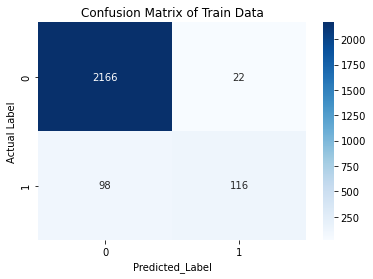

In [390]:
sns.heatmap((metrics.confusion_matrix(df1_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted_Label');
plt.ylabel('Actual Label',rotation=90);
plt.title('Confusion Matrix of Train Data')

In [391]:
print(metrics.classification_report(df1_train["default"],y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2188
           1       0.84      0.54      0.66       214

    accuracy                           0.95      2402
   macro avg       0.90      0.77      0.82      2402
weighted avg       0.95      0.95      0.95      2402



In [392]:
# Model Evaluation of Test Data

y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

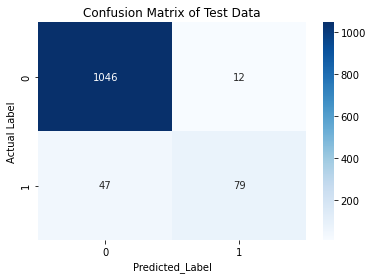

In [393]:
sns.heatmap((metrics.confusion_matrix(df1_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted_Label');
plt.ylabel('Actual Label',rotation=90);
plt.title('Confusion Matrix of Test Data');

In [394]:
print(metrics.classification_report(df1_test["default"],y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1058
           1       0.87      0.63      0.73       126

    accuracy                           0.95      1184
   macro avg       0.91      0.81      0.85      1184
weighted avg       0.95      0.95      0.95      1184

